
# Neurasmus Summer School, Models of neural activity

In this workshop, we will learn about different mathematical models of neural activity.

Keep it mind that:

*All models are wrong, some of them are usefull*

-George E. P. Box

There is always a tradeoff simplicity and descriptive power.

The models you will choose for your research projects will depend on which aspect of neural behaviour you want to focus on.

### The Hogkin-Huxley model

The Hodgkin-Huxley has a practical as well as historical importance.

Hodgkin and Huxley received the Nobel prize for their work in neuroscience.

An advantage of the Hodgkin Huxley model is that variables and parameters correspond to concrete biophysical entities.



*    Action potential are caused be **sodium** and **potassium** currents.
*   The opening and closing of **sodium** and **potassium** channels is determined by the membrane potential.
*  Sodium channels are regulated by $m$ and $h$ gates.
* Potassium channels are regulated by $n$ gates.


We begin by defining the opening and closing rate  functions for the $m$, $n$ and $h$ gates.

$\alpha$ denotes an opening rate.

$\beta$ denotes a closing rate.

In [87]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import statistics

def alphan(V):
  #n gate opening rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V-25)<0.01:
    V=25.001
  alpha=0.02*(V-25)/(1-math.e**(-(V-25)/9))
  return alpha

def alpham(V):
  #m gate opening rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V+35)<0.01:
    V=-35.001
  alpha=0.182*(V+35)/(1-math.e**(-(V+35)/9))
  return alpha

def alphah(V):
  #h gate opening rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  alpha=0.25*math.e**(-(V+90)/12)
  return alpha

def betan(V):
  #n gate closing rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V-25)<0.01:
    V=25.001
  beta=-0.002*(V-25)/(1-math.e**((V-25)/9))
  return beta

def betam(V):
  #m gate closing rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  if abs(V+35)<0.01:
    V=-35.001
  beta=-0.124*(V+35)/(1-math.e**((V+35)/9))
  return beta

def betah(V):
  #h gate closing rate
  # INPUT: V, membrane potential
  # OUTPUT: alpha, opening rate
  beta=0.25*math.e**((V+62)/6)/(math.e**((V+90)/12))
  return beta

Let's plot the values of these functions

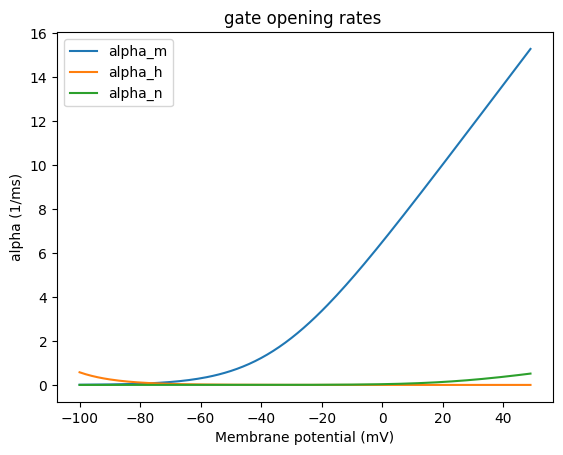

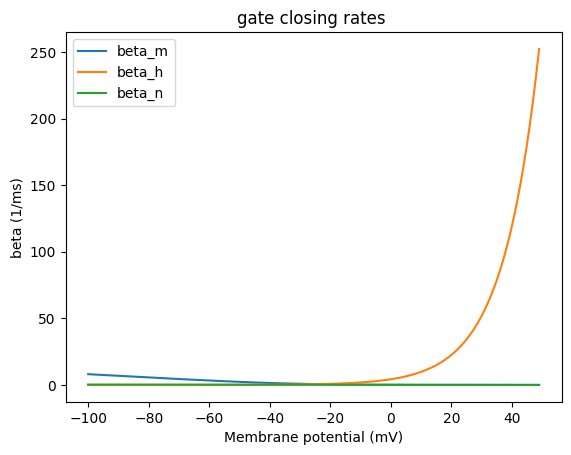

In [88]:
Vvec=[]
alphamvec=[]
alphahvec=[]
alphanvec=[]
betamvec=[]
betahvec=[]
betanvec=[]
for j in range(150):
  V=-100+j
  Vvec.append(V)
  am=alpham(V)
  an=alphan(V)
  ah=alphah(V)
  bm=betam(V)
  bn=betan(V)
  bh=betah(V)

  alphanvec.append(an)
  alphamvec.append(am)
  alphahvec.append(ah)
  betanvec.append(bn)
  betamvec.append(bm)
  betahvec.append(bh)

#plotting the opening rate functions
plt.plot(Vvec,alphamvec,Vvec,alphahvec,Vvec,alphanvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('alpha (1/ms)')
plt.legend(['alpha_m','alpha_h','alpha_n'])
plt.title('gate opening rates ')
plt.show()

plt.plot(Vvec,betamvec,Vvec,betahvec,Vvec,betanvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('beta (1/ms)')
plt.legend(['beta_m','beta_h','beta_n'])
plt.title('gate closing rates ')
plt.show()


The above figures are difficult to interpret.

Explicitely, the dynamics of the gates are given by

$$
\frac{dm}{dt}=(1-m)\alpha_m(V)-m\beta_m(V).
$$
With similar equations for gates of type $n$ and $h$

The equilibrium value ($dm/dt=0$) is given by
$$
m_{eq}(V)=\frac{\alpha_m(V)}{\alpha_m(V)+\beta_m(V)}.
$$

We also have
$$
\frac{dm}{dt}=(m_{eq}(V)-m)(\alpha_m(V)+\beta_m(V)).
$$

We define the time constant
$$
\tau_m(V)=\frac{1}{\alpha_m(V)+\beta_m(V)}.  
$$

With this notation, we can now write
$$
\frac{dm}{dt}=\frac{m_{eq}(V)-m}{\tau_m(V)}.
$$
This form is more easy to interpret.

In [89]:
def meq(V):
  #equilibrium value of the m gate
  #INPUT: V, membrane potential
  #OUTPUT: equi, the equilibrium value
  equi=alpham(V)/(alpham(V)+betam(V))
  return equi

def taum(V):
  #time constant of the m gate
  #INPUT: V, membrane potential
  #OUTPUT:timecst, the time constant of the m gate
  timecst=1/(alpham(V)+betam(V))
  return timecst

def neq(V):
  #Equilibrium value of the n gate
  #INPUT: V, membrane potential
  #OUTPUT: equi, the equilibrium value of the n gate
  equi=alphan(V)/(alphan(V)+betan(V))
  return equi

def taun(V):
  #Time constant of the n gate
  #INPUT: V, membrane potential
  #OUTPUT, timecst, the time constant of the n gate
  timecst=1/(alphan(V)+betan(V))
  return timecst

def heq(V):
  #Equilibrium value of the h gate
  #INPUT:V, membrane potential
  #OUTPUT, equi, equilibrium value of the h gate
  equi=alphah(V)/(alphah(V)+betah(V))
  return equi

def tauh(V):
  #Time constant of the h gate
  #INPUT: V, membrane potential
  #OUTPUT, timecst, time constant of the h gate
  timecst=1/(alphah(V)+betah(V))
  return timecst

let's plot these functions

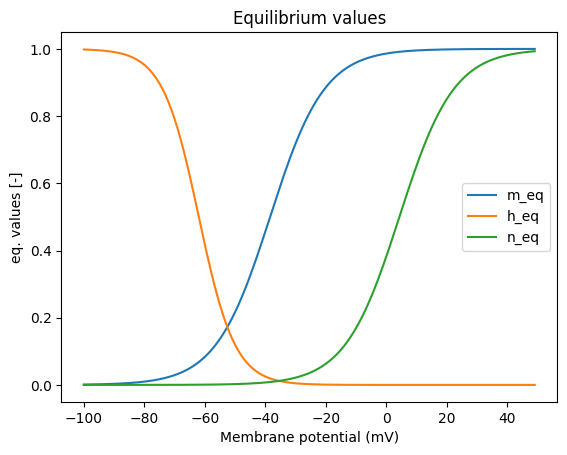

In [90]:
Vvec=[]
taumvec=[]
tauhvec=[]
taunvec=[]
meqvec=[]
heqvec=[]
neqvec=[]
for j in range(150):
  V=-100+j
  Vvec.append(V)
  tm=taum(V)
  tn=taun(V)
  th=tauh(V)
  me=meq(V)
  ne=neq(V)
  he=heq(V)

  taumvec.append(tm)
  tauhvec.append(th)
  taunvec.append(tn)
  meqvec.append(me)
  neqvec.append(ne)
  heqvec.append(he)

#Plotting the time constants
plt.plot(Vvec,taumvec,Vvec,tauhvec,Vvec,taunvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Time constants (ms)')
plt.legend(['tau_m','tau_h','tau_n'])
plt.title('rate constants')
plt.show()

#Plotting the equilibrium values
plt.plot(Vvec,meqvec,Vvec,heqvec,Vvec,neqvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('eq. values [-]')
plt.legend(['m_eq','h_eq','n_eq'])
plt.title('Equilibrium values')
plt.show()


A few observations on these figures


*   The $h$ and $n$ gates have similar time constant.
*   The $m$ gate has a much smaller time constant (it is more rapid).
*   The $m$ and $n$ gates open when the membrane potential depolarizes.  They are *activation* ngates.
*   The $n$ gate closes when the membrane potential depolarizes, it is an *inactivation* gate.

We can now define the full model. It will use the auxiliary functions that we just defined.

A technical word: In Python, when we want to use ordinary differential equations, we begin by writing a function the defines the right-hand side of the ODE system. Then we use a built in solver such as ODEINT to obtain the solution.

In [91]:
def HHmodel(y,t,Iinj):
  #Define the right hand side of the equations describing the HH model
  #INPUT:  y a vector of length 4 describing the state of the system.
  #y[0] membrane potential
  #y[1] m gate
  #y[2] n gate
  #y[3] h gate
  #OUTPUT: dydt
  # a vector of length 4 containing the temporal derivative of the variables
  dydt=np.zeros(4)
  V=y[0]
  m=y[1]
  n=y[2]
  h=y[3]

  gna=40
  gk=35
  gL=0.3
  ENa=55
  EK=-77
  EL=-65
  C=1

  I=gna*m*m*m*h*(ENa-V)+gk*n*n*n*n*(EK-V)+gL*(EL-V)+Iinj
  dydt[0]=I/C
  dydt[1]=(meq(V)-m)/taum(V)
  dydt[2]=(neq(V)-n)/taun(V)
  dydt[3]=(heq(V)-h)/tauh(V)
  return dydt




In [92]:
#When solving an ode system, we have to specify initial conditions.
#Here we begin with a membrane potential equal to -60 mV which is a standard resting value
#We start with all gates closed which is arbitrary.
yinit=np.zeros(4)
yinit[0]=-60
yinit[1]=0

#We also have to specify the time interval on which the model will be solved
#First entry: initial time,
#Second entry: final time,
#third entry: number of time points

t = np.linspace(0,1000,10000)



inally,  ode models have **parameters**.

Contrary to variables which evolve continuously with time, parameters values remain constant trhoughout the simulation.

From a biological perspective, the distinction between variables and parameters is somewhat arbitrary.  Parameters may change on long time scales.

The Hodgkin-Huxley model has many parameter such as sodium conductance, potassium conductance and leak conductance.  

We will focus on the injected current as a parameter of the model.

We expect the following behaviour


*   When there is no injected current or when the injected current is small, the neuron should be in a resting state.
*   When the injected current is strong enough, we should see action potential.


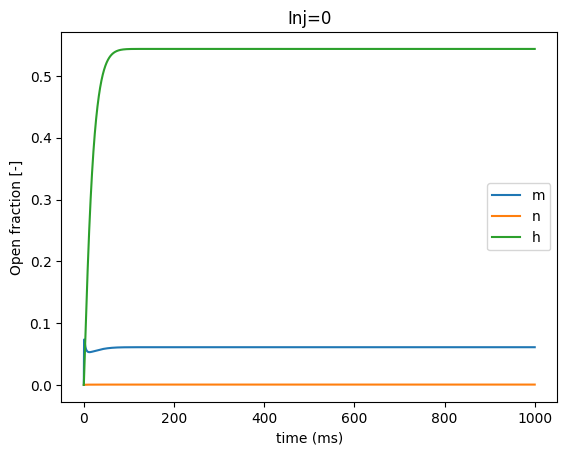

In [93]:
#We first run the model the model with no injected current
Iinj=0
# solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#Plotting the time course of the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('Iinj=0')
plt.show()

#Plotting the time course of the gating variables
plt.plot(t,y[:,1],t,y[:,2],t,y[:,3])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('Inj=0')
plt.legend(['m','n','h'])
plt.show()


Not much happening here...

Let's run with a moderate value of injected current.

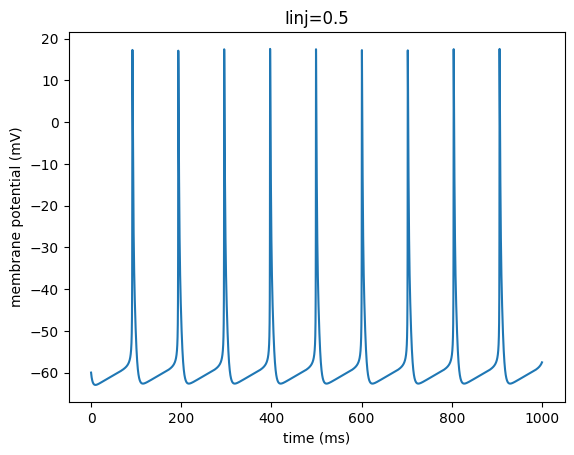

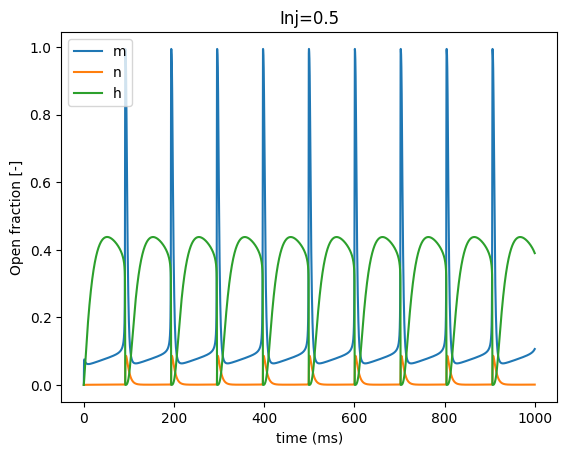

In [94]:
#We specify a moderate value of injected current
Iinj=0.4
# solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#We plot the time course of the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('Iinj=0.5')
plt.show()

#We plot the time courss of the gating variable
plt.plot(t,y[:,1],t,y[:,2],t,y[:,3])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('Inj=0.5')
plt.legend(['m','n','h'])
plt.show()


We now observe constant rate spiking.

What happens when the current is further increased?

The answer might be surprising...

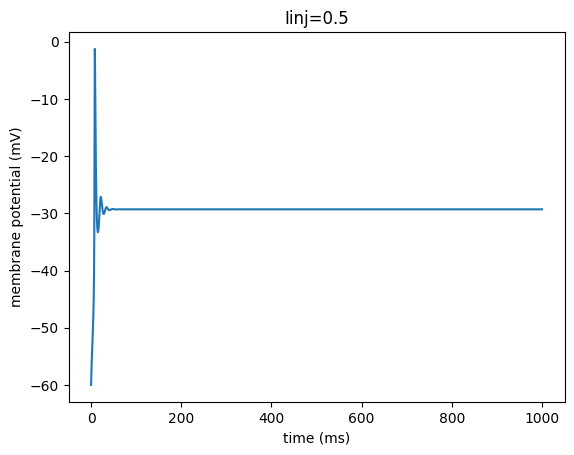

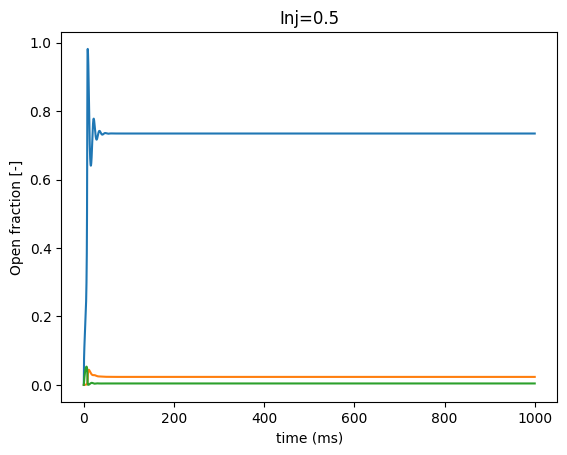

In [95]:
#Specifying a strong value of injected current
Iinj=5
# solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#Plotting the time course of the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('Iinj=0.5')
plt.show()

#Plotting the time course of the gating variables.
plt.plot(t,y[:,1],t,y[:,2],t,y[:,3])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('Inj=0.5')
plt.show()


The neuron now converges to a steady state as when there is no injected current. However the steady-state is now more depolarized.

#### **Exercices related to the Hodgkin Huxley model:**

1. We defined

t = np.linspace(0,1000,10000)

That is, we solved the equations on 10000 time points over 1000 ms. This corresponds to a time point every 0.1 ms.

What if we increase or the number of time points?

* Try very high and very low values.

* What happens to the time it takes to solve the problem?

*  What happens to the quality of the solution?

*  Which number of time points would you choose?

2. There is two values of injected current for which we observed sharp transitions. A first transition occurs when the neurons leaves the normal resting state and begins emitting action potentials.  A second transitions occurs when the neuron stops emitting action potential to reach a depolarized steady state.

* Try several values of injected currents.
* Find the values of injected currents for which we observe these transitions.

### The Morris Lecar-Model

**The Morris-Lecar model**

Given  the relative complexity of Hodgkin-Huxley models, it is difficult to use them in large networks.

Is it possible to reduce the number of variables while preserving the behaviour of the model?

The **Morris-Lecar model** proposes such a reduction. It was developed by Catherine Morris and Harold Lecar.

This model has only two variables instead of four for the Hodgkin-Huxley model.

Two observations allow the reduction of the Hodgkin-Huxley model into a two dimensional one.

**First observation:**  The time constant of the $m$ gate is very small when compared to other variables.  

 This implies that the dynamics of the $m$ gated are very rapid.

 A reasonable approach is thus to aussume thata the proportion of open $m$ gates is equal to its equilibrium value.

In [96]:
#Let's run the HH model again
Iinj=0.4
# Solving the ODE
y = odeint(HHmodel,yinit,t,args=(Iinj,))

#Export the equilibrium value of the m gat
me=[]
for i in y[:,0]:
  me.append(meq(i))

#Plotting the equilibrium and actual values of the m gates
plt.plot(t,me,t,y[:,1])
plt.xlabel('time (ms)')
plt.ylabel('open fraction [-]')
plt.title('Dynamics of meq')
plt.legend(['m_eq','m'])
plt.show()

#Plotting the difference between m and meq
plt.plot(t,me-y[:,1])
plt.xlabel('time (ms)')
plt.ylabel('open fraction [-]')
plt.title('difference betwen m and meq')
plt.show()


print('Square root of the mean squared difference')
print(math.sqrt(statistics.mean((me-y[:,1])*(me-y[:,1]))))

Square root of the mean squared difference
0.021802640708045704


In the first figure, the actual value of the $m$ gates and the equilibrium value of the $m$ gate are indistinguishable.

The mean value of the difference between $m$ and $m_{eq}$ is very small.

**Second observation**: The gating variables $n$ and $h$ have similar time constants.  There is a strong dependencies betweeen these variables which allows to eliminate one.

Intercept of the linear regression:
0.38008611160198164
Slope of the linear regression
-6.235863451821517
Correlation between n and h
-0.822983015195745


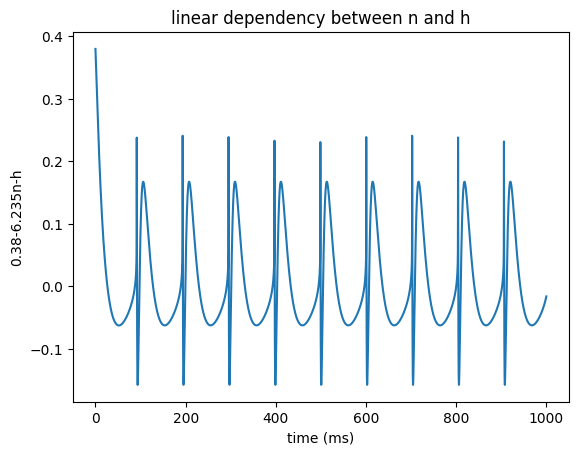

In [97]:
#We compute a linear regression between n and h
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(y[:,2].reshape(-1,1),y[:,3])

#We print the results
print('Intercept of the linear regression:')
print(model.intercept_)
print('Slope of the linear regression')
print(model.coef_[0])

#Compute and print correlation coefficient between n and h
r=np.corrcoef(y[:,2],y[:,3])
print('Correlation between n and h')
print(r[0][1])

#Printing the residual
plt.plot(t, model.intercept_+model.coef_*y[:,2]-y[:,3])
plt.xlabel('time (ms)')
plt.title('linear dependency between n and h')
plt.ylabel('0.38-6.235n-h')
plt.show()



The form of the Morris-Lecar model can be obtained from these two assumptions.

The equations of the Morris-Lecar model are given by
$$
C\frac {dV}{dt}=I-g_{\mathrm {L} }(V-V_{\mathrm {L} })-g_{\mathrm {Ca} }M_{\mathrm {ss} }(V-V_{\mathrm {Ca} })-g_{\mathrm {K} }N(V-V_{\mathrm {K} }),
$$

$$
\frac{dN}{dt}=\frac{N_{\mathrm{ss}}-N}{\tau_{N}}.
$$

Observe that calcium ions are used instead of sodium.  It is because the Morris-Lecar model was originally developed for barnacles.  It makes no differences from a mathematical perspective.

The model relies on the following auxiliary functions:

$M_{ss}:$ The equilibrium value of the $m$ gate,

$N_{ss}:$ The equilibrium value of the $n$ gate,

$\tau_N:$ The time constant of the $N$ gate.

These auxiliary functions are given by:

\begin{aligned}M_{\mathrm {ss} }&~=~{\frac {1}{2}}\cdot \left(1+\tanh \left[{\frac {V-V_{1}}{V_{2}}}\right]\right)\\[5pt]N_{\mathrm {ss} }&~=~{\frac {1}{2}}\cdot \left(1+\tanh \left[{\frac {V-V_{3}}{V_{4}}}\right]\right)\\[5pt]\tau _{N}&~=~1/\left(\varphi \cosh \left[{\frac {V-V_{3}}{2V_{4}}}\right]\right)\end{aligned}

Here $cosh$ and $tanh$ denote hyperbolic trigonometric functions.

Let's define the auxiliary functions of the Morris-Lecar model

In [98]:
def tanh(x):
  #compute the hyperbolic tangent
  #INPUT x, a real number
  #OUTPUT tanhyp, the hyperbolic tangent
  tanhyp=(math.e**(x)-math.e**(-x))/(math.e**(x)+math.e**(-x))
  return tanhyp

def cosh(x):
  #Compute the hyperbolic cosine
  #INPUT x, a real number
  #OUTPUT coshyp, the hyperbolic cosine
  coshyp=(math.e**(x)+math.e**(-x))/2
  return coshyp

def minfML(V,V1,V2):
  #Computes the steady state of the M gate in the ML model
  #INPUT:
  #V,the membrane potential
  #V1,V2 parameters of the ML model
  #OUTPUT, minf the steady-state value of M
  minf=0.5*(1+tanh((V-V1)/V2))
  return minf

def ninfML(V,V3,V4):
 #Computes the steady state of the N gate in the ML model
 #INPUT:
 #V, the membrane potential
 #V3,V4, parameters of the ML model
 #OUTPUT, ninf the steady-state value of N
  ninf=0.5*(1+tanh((V-V3)/V4))
  return ninf

def taunML(V,V3,V4):
  #Computes the time constant of the N gate in the ML model
  #INPUT:
  #V, the membrane potential
  #V3,V4, parameters of the ML model
  #OUTPUT: taun, the time constant of N
  taun=1/cosh((V-V3)/(2*V4))
  return taun


Let's plot these functions

In [99]:
Vvec=[]
minfvec=[]
ninfvec=[]
taunvec=[]
V1=-1.2
V2=18
V3=2
V4=30

for j in range(150):
  V=-100+j
  Vvec.append(V)
  minfvec.append(minfML(V,V1,V2))
  ninfvec.append(ninfML(V,V3,V4))
  taunvec.append(taunML(V,V3,V4))

#Plotting the steady-state values of n and h
plt.plot(Vvec,minfvec,Vvec,ninfvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('open fraction [-]')
plt.title('equilibrium fraction')
plt.legend(['m','n'])
plt.show()

#Plotting the value of tau_n
plt.plot(Vvec,taunvec)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('tau_n (1/ms)')
plt.title('Time constant of the n gate')
plt.show()


We now implement the Morris-Lecar model itself

In [100]:
def MLmodel(y,t,Iinj):
  #This function specifies the right-hand side of the equations defining the Morris-Lecar model
  #INPUT: y, a length two vector containing the state of the model
  #y[0], membrane potential
  #y[1], the N gate
  #t: a scalar, time
  #Iinj:  A real valued parameter, the current injected into the neuron
  #OUTPUT: dydt, a vector containing the time derivatives of the model variables
  dydt=np.zeros(2)
  V=y[0]
  n=y[1]
  gCa=4.4
  V3=2
  V4=30
  ECa=120
  EK=-84
  EL=-60
  gK=8
  gL=2
  V1=-1.2
  V2=18
  CM=20
  phi=0.04
  I=gL*(EL-V)+Iinj


  I=gCa*minfML(V,V1,V2)*(ECa-V)+gK*n*(EK-V)+gL*(EL-V)+Iinj
  dydt[0]=I/CM
  dydt[1]=phi*(ninfML(V,V3,V4)-n)/taunML(V,V3,V4)

  return dydt

As was the case for the Hodgkin Huxley model, before solving the model, we have to specify initial conditions and the time points of the solution.

In [101]:
#Specifying initial conditions
yinit=np.zeros(2)
#membrane potential = -60 mV, a standard resting value
yinit[0]=-60
#We assumed that all n gates are initially closed
yinit[1]=0

#Specifying the time points of the solution, from  0 to 100ms with dt=0.1ms
t = np.linspace(0,100,1000)

We first run the model with no injected current

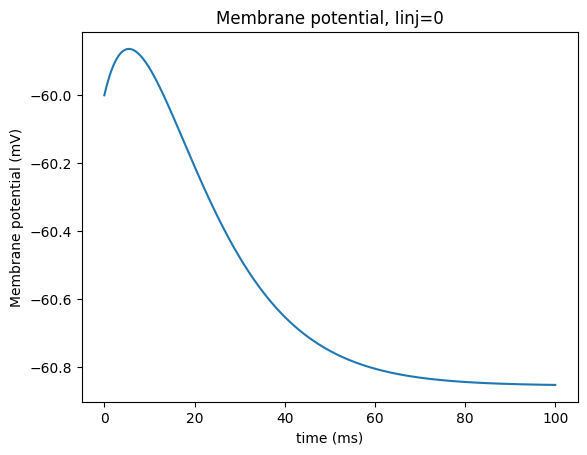

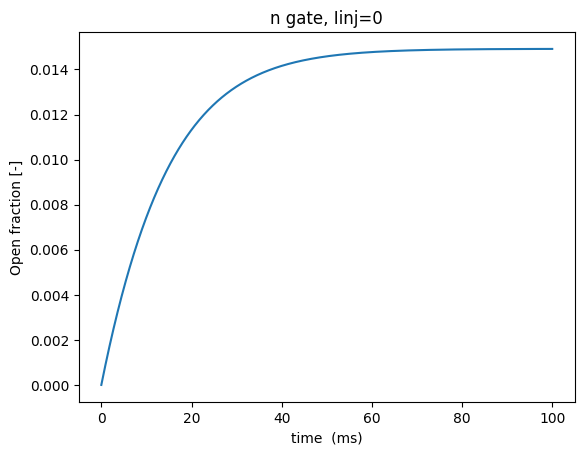

In [102]:

Iinj=0
y = odeint(MLmodel,yinit,t,args=(Iinj,))

#Plotting the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential, Iinj=0')
plt.show()

#Plotting the n gate
plt.plot(t,y[:,1])
plt.xlabel('time  (ms)')
plt.ylabel('Open fraction [-]')
plt.title('n gate, Iinj=0')
plt.show()

Let's increase the injected current to a value for which we will see action potentials

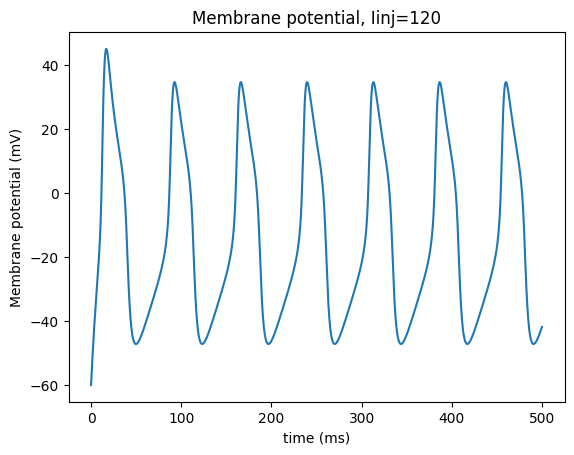

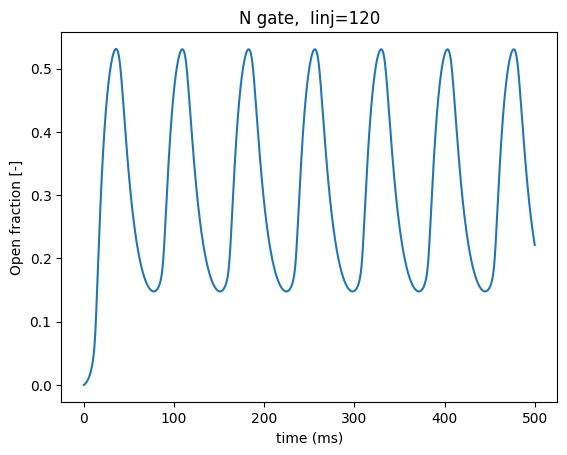

In [103]:
#Specifying the initial conditions
yinit=np.zeros(2)
yinit[0]=-60
yinit[1]=0

#Specifying the time  points of the solution
t = np.linspace(0,500,2000)

#Specifying the injected current
Iinj=120

#solving the model
y = odeint(MLmodel,yinit,t,args=(Iinj,))

#plotting the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential, Iinj=120')
plt.show()

#plotting the n gate
plt.plot(t,y[:,1])
plt.xlabel('time (ms)')
plt.ylabel('Open fraction [-]')
plt.title('N gate,  Iinj=120')
plt.show()

Do we observe a phenomenon similar to what is observed in the HH model when the current is further increased?

 That is, will the neuron  stop firing and converge to a depolarized steady-state?

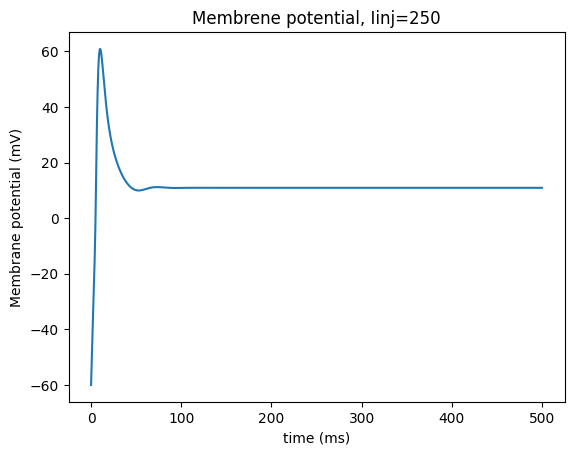

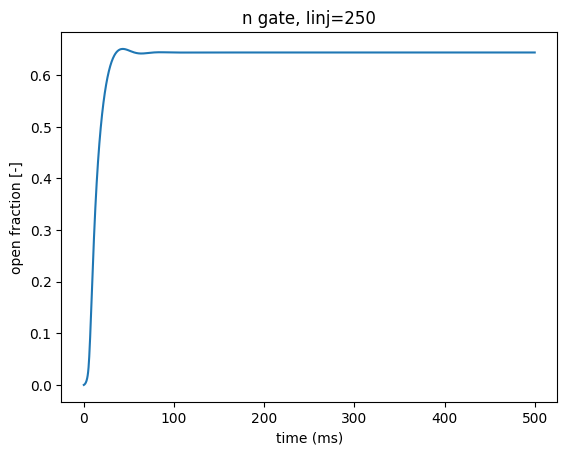

In [104]:
#Specifying the initial conditions
yinit=np.zeros(2)
yinit[0]=-60
yinit[1]=0

#Specifying the time points on which the solutions are computed
t = np.linspace(0,500,2000)

#Specifying the injected current
Iinj=250

#Solving the model
y = odeint(MLmodel,yinit,t,args=(Iinj,))

#Plotting the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrene potential, Iinj=250')
plt.show()

#Plotting the n gate
plt.plot(t,y[:,1])
plt.xlabel('time (ms)')
plt.ylabel('open fraction [-]')
plt.title('n gate, Iinj=250')
plt.show()

Let's do a sweep over current values and plot the minimum and maximum of membrane potential.

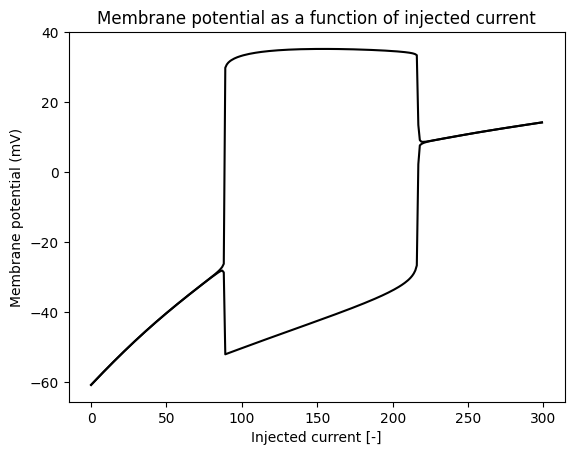

In [105]:
cur_vec=[]
min_v_vec=[]
max_v_vec=[]
#Looping over possible current values
for j in range(300):
  Iinj=j
  cur_vec.append(Iinj)
  y = odeint(MLmodel,yinit,t,args=(Iinj,))
  L=len(t)
  min_v_vec.append(min(y[int(L/2):L-1,0]))
  max_v_vec.append(max(y[int(L/2):L-1,0]))

#plotting the results
plt.plot(cur_vec,min_v_vec,'-k',cur_vec,max_v_vec,'-k')
plt.xlabel('Injected current [-]')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential as a function of injected current')
plt.show()

We now look at how the firing rate depends upon the injected current.

A difficult with HH and ML model is that there is no clear way to tell when the membrane emits an action potential.

We fix a somewhat arbitrary threshold (20 mV) and detect an action potential when the membrane potential crosses this threshold.

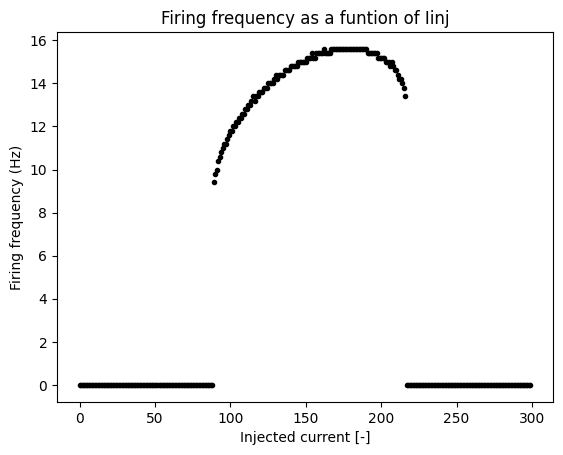

In [106]:
# When specify of long time interval to obtain smooth results
t = np.linspace(0,10000,40000)
cur_vec=[]
freq_vec=[]
tresh=20

#Looping over possible current values
for j in range(300):
  Iinj=j
  y = odeint(MLmodel,yinit,t,args=(Iinj,))
  L=len(t)
  vm_vec=y[int(L/2):L-1,0]
  freq=0
  ind=0
  Nb_pts=len(vm_vec)-1
  for j in range(Nb_pts-1):
    if (vm_vec[j]<tresh) and (vm_vec[j+1]>tresh):
      freq=freq+1
  freq_vec.append(2*1000*freq/t[-1])
  cur_vec.append(Iinj)

#Plotting the results
plt.plot(cur_vec,freq_vec,'.k')
plt.xlabel('Injected current [-]')
plt.ylabel('Firing frequency (Hz)')
plt.title('Firing frequency as a funtion of Iinj')
plt.show()

When a model has only two variables it is interesting to show the trajectories of the solution **in a phase-plane**.

Instead of plotting each variable as a function of time, we plot one variable as a function of the other one.

In the phase plan, regular spiking becomes a closed trajectory and yields a limit cycle.

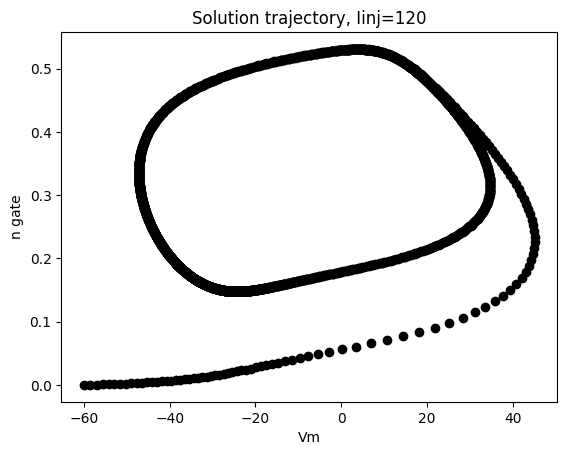

In [107]:
#Specifying the initial conditions
yinit=np.zeros(2)
yinit[0]=-60
yinit[1]=0

#Specifying the time points on which the solutions are calculated
t = np.linspace(0,500,2000)

#Specifying the injected current
Iinj=120

#Solving the model
y = odeint(MLmodel,yinit,t,args=(Iinj,))

#Plotting the results
plt.plot(y[:,0],y[:,1],'ok')
plt.xlabel('Vm')
plt.ylabel('n gate')
plt.title('Solution trajectory, Iinj=120')
plt.show()

The nullclines help to understand and interpret the trajectories of the solutions.

The nullclines are curves on which the temporal derivative of a variable is equal to zero.

In our case, we plot the solutions to  dV/dt=0  and  dn/dt=0 .

Let's add the nullclines to our phase plane.

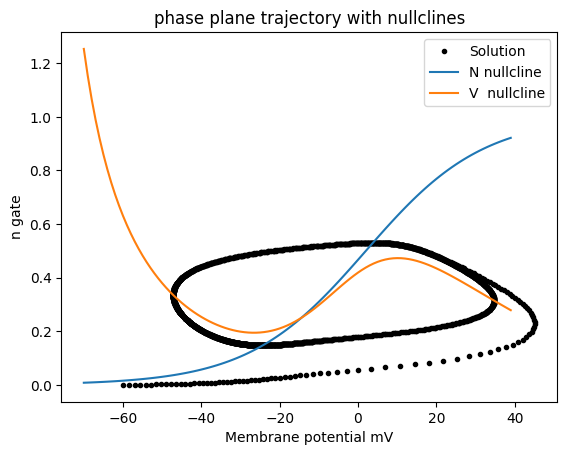

In [108]:
def NullCline(Iinj):
  #Computing the nullclines
  Vind=[]
  Ndep=[]
  Nind=[]
  Vdep=[]
  V3=2
  V4=30

  V1=-1.2
  V2=18
  gCa=4.4
  ECa=120
  EK=-84
  EL=-60
  gK=8
  gL=2
  for j in range(110):
    V=-70+j
    N=j/150

    Vind.append(V)
    Ndep.append(ninfML(V,V3,V4))
    mss=minfML(V,V1,V2)
    Vdep.append(V)
    Nind.append(-(gCa*mss*(ECa-V)+gL*(EL-V)+Iinj)/(gK*(EK-V)))
  return Vind, Ndep, Vdep, Nind

Iinj=120

Vind, Ndep, Vdep, Nind=NullCline(Iinj)

#plotting the results
plt.plot(y[:,0],y[:,1],'.k',Vind,Ndep,Vdep,Nind)
plt.xlabel('Membrane potential mV')
plt.ylabel('n gate')
plt.title('phase plane trajectory with nullclines')
plt.legend(['Solution', 'N nullcline', 'V  nullcline'])
plt.show()



Remark that:


1.   When the solution crosses the $V$ nullcline, the trajectory is vertical.
2.   When the solution crosses the $N$ nullcline, the trajectory is horizontal.




Let's repeat this buth with no injected current



In [109]:
#Specifying the initial conditions
yinit=np.zeros(2)
yinit[0]=-60
yinit[1]=0

#Specifying the time points on which the solutions are computed.
t = np.linspace(0,500,2000)

#Specifying the injected current
Iinj=0

#Solving the model
y = odeint(MLmodel,yinit,t,args=(Iinj,))


In [110]:
#Computing the nullclines
Vind, Ndep, Vdep, Nind=NullCline(Iinj)

#Plotting the results
plt.plot(y[:,0],y[:,1],'ok',Vind,Ndep,Vdep,Nind)
plt.xlabel('Membrane potential (mV)')
plt.title('phase plane trajectory with nullclines')
plt.legend(['Solution', 'N nullcline', 'V  nullcline'])
plt.show()

We repeat the numerical experiment but now with very large current values

In [111]:
#Specifying the initial conditions
yinit=np.zeros(2)
yinit[0]=-60
yinit[1]=0

#Specifying the solution time points
t = np.linspace(0,500,2000)

#Specifying the injected current
Iinj=300

#Solving the model
y = odeint(MLmodel,yinit,t,args=(Iinj,))

#Computing the nullclines
Vind, Ndep, Vdep, Nind=NullCline(Iinj)

#Plotting the result
plt.plot(y[:,0],y[:,1],'ok',Vind,Ndep,Vdep,Nind)
plt.xlabel('Membrane potential (mV)')
plt.ylabel('N gate')
plt.title('phase plane trajectory with nullclines')
plt.legend(['Solution', 'N nullcline', 'V  nullcline'])
plt.show()



**A few remarks on the phase plane representation and nullcline**



1.   A steady-state corresponds to intersections of nullclines.
2.   In our example, the two nullclines intersect at exactly one point.
3.   Whe the solution decribe a limit cycle (steady rate spiking) the fixed point is unstable.
4. When the fixed point is on the left of the local minimum of the $V$ nullcline, the system converges to the normal resting state.
5. When the fixed point is between the local miminum and the local maximum of the $V$ nullcline, the neurons emits action potential.
6. When the fixed point is on the right of the local maximum of the $V$ nullcline, the neuron converges to the depolarized steady-state.   



In [112]:
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.editor import VideoClip
from moviepy.editor import *

frames=[]
fig = plt.figure()
fig, ax = plt.subplots()
artists=[]

seq=[]
for cur in range(300):
  Iinj=cur
  #Computing the nullclines
  Vind, Ndep, Vdep, Nind=NullCline(Iinj)
  y = odeint(MLmodel,yinit,t,args=(Iinj,))


  #Plotting the
  ax.cla()
  ax.plot(y[:,0],y[:,1],'ok',Vind,Ndep,Vdep,Nind)
  plt.xlabel('Membrane potential (mV)')
  plt.ylabel('N gate')
  plt.title('phase plane trajectory with nullclines, Iinj = '+str(cur))
  plt.legend(['Solution', 'N nullcline', 'V  nullcline'])
  plt.xlim(-80, 50)
  plt.ylim(-0.2,1)


  name=str(cur)+'.png'
  fig.savefig(name)
  seq.append(name)


clip = ImageSequenceClip(seq,fps=10)

clip.ipython_display(width = 500)



Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<Figure size 640x480 with 0 Axes>

### Bursting Morris-Lecar Model

Thus far, we observed two types of neural activity.   

A quiet state and a state in which the neuron emits action potentials at a regular rate.

However, other types of dynamics play important roles in neural networks.  An important dynamic is that of **bursting**.

**Bursting** is characterizing by periods of high frequency spiking alternating with quiet periods.

Bursting is believed to play an important role in information processing.

Bursting can occur as a result of network effects.  It calso occur as a result of single neurun properties.   

We will extend the Morris-Lecar model to describe the dynamics of calcium concentration.  This will give rise to single cell intrinsec bursting.

In [113]:
def MLmodelBurst(y,t,Iinj):
  # This function defines  the right hand side of the bursting Morris-Lecar model
  #INPUT: y, a vector of length 3 describing the state of the system
  #y[0], membrane potential,
  #y[1], N gate
  #y[2], calcium concentration
  #t, a real number, time
  #Iinj, a real parameter, injected current
  #OUTPUT: dydt, a vector of length 3 containing the temporal derivatives of the variables.
  dydt=np.zeros(3)
  V=y[0]
  n=y[1]
  Ca=y[2]
  gCa=4.4
  V3=2
  V4=30
  ECa=120
  EK=-84
  EL=-60
  gK=8
  gL=2
  V1=-1.2
  V2=18
  CM=1
  phi=0.04
  KCa=3
  eps=0.0005
  mu=0.01667
  gKCa=2

  IKCa=gKCa*(Ca/(Ca+1))*(EK-V)
  ICa=gCa*minfML(V,V1,V2)*(ECa-V)

  I=ICa+IKCa+gK*n*(EK-V)+gL*(EL-V)+Iinj
  dydt[0]=I/CM
  dydt[1]=phi*(ninfML(V,V3,V4)-n)/taunML(V,V3,V4)
  dydt[2]=eps*(mu*ICa-KCa*Ca)
  return dydt

Let's solve the model and plot the result

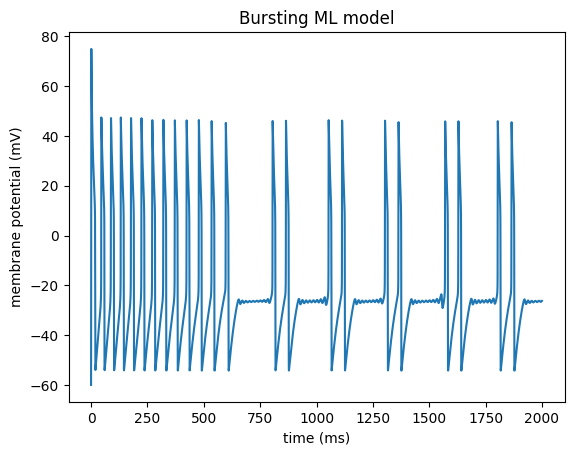

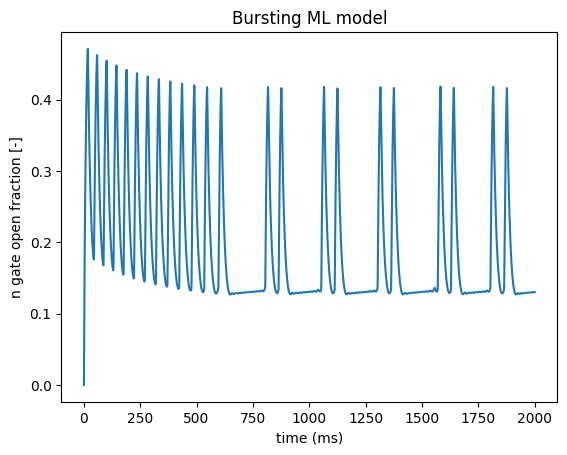

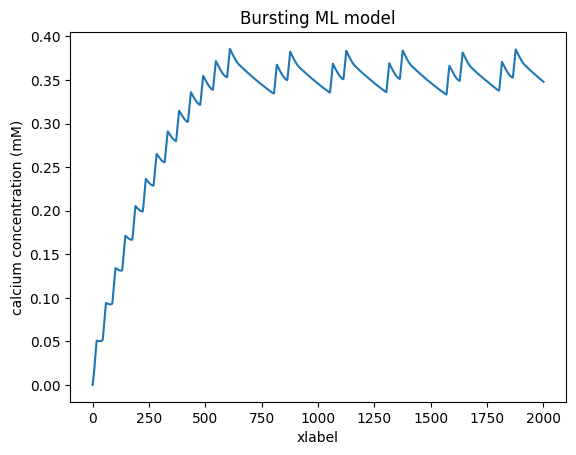

In [114]:
#Define the initial conditions
yinit=np.zeros(3)
# The initial membrane potential is -60, a standard resting value
yinit[0]=-60
yinit[1]=0
yinit[2]=0

#Specifying the time points on which the system will be solved
t = np.linspace(0,2000,5000)

#specifying the injected current
Iinj=120

#Solving the model
y = odeint(MLmodelBurst,yinit,t,args=(Iinj,))

#plotting the membrane potential
plt.plot(t,y[:,0])
plt.xlabel('time (ms)')
plt.ylabel('membrane potential (mV)')
plt.title('Bursting ML model')
plt.show()

#plotting the n gate
plt.plot(t,y[:,1])
plt.xlabel('time (ms)')
plt.ylabel('n gate open fraction [-]')
plt.title('Bursting ML model')
plt.show()

#Plotting the calcium concentration
plt.plot(t,y[:,2])
plt.xlabel('xlabel')
plt.ylabel('calcium concentration (mM)')
plt.title('Bursting ML model')
plt.show()

**Observations:**


1.   We observe bursts of two quick spikes separated by a period of $\sim 300$  ms without spike.
2.   The calcium concentration increases during bursting episodes due to spiking.  When the calcium concentration increases, calcium dependant potassium channels open. This leads to hyperpolarizes and stop spiking.
3. The dynamics of calcium is slower than the dynamics of other variables.The introduction of another time scale allors the enrichment of the dynamics.



#### Exercices related to the bursting Morris Lecar model.

Exercice 1. Launch the bursting Morris-Lecar model with different values of injected current. How does the time betwen burst and the number of spike within each burst depend on the injected current?

Exercice 2. The bursting Morris-Lecar model is taken from the following paper https://www.scirp.org/pdf/am_2020031614540992.pdf Implement the different types of behaviour described in the paper.

## Discontinuous models

We now present a simpler family of mathematical models describing neural activities.
Discontinuous models.
The time course of membrane potential during an action potential is difficult to describe.
One can simplify the model by omitting the description. of the action potential altogether.

### Leaky Integrate and Fire (LIF) models

LIF models are one of the simplest class of models describing the spiking behaviour of neurons.

Assumptions of the LIF model:

-Neurons emit an action potential when their membrane potential reaches a threshold value.

-The action potential is considered instantaneous.

-After an action potential, the membrane potential is resetted to an hyperpolarized value.

Let's illustrate this with a model of a single neuron into which we inject a constant current.

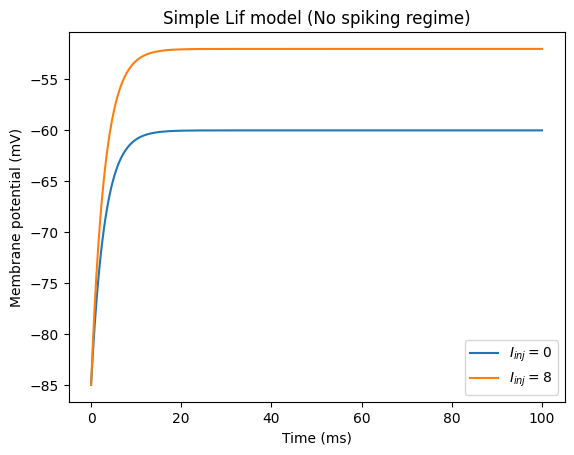

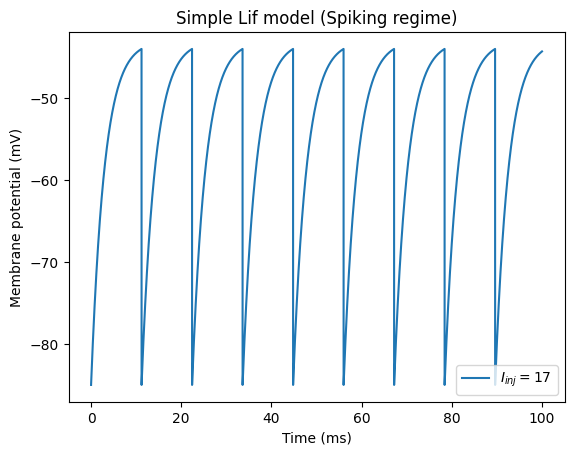

In [115]:
from matplotlib import pyplot as plt
import math

#A single neuron LIF model

def LIF(I_inj):
  #This function computes the response of a single neuron described by a LIF model
  #INPUT: I_inj, a real number, a constant current injected into the cell
  #OUTPUT: Time_Vec, a real vector, the time points of the simulation
  #Vm_Vec, a real vector, the membrane potential

  Sim_dur=100#(ms) duration of the simulation
  dt=0.01#(ms) timestep of the simulation

  Cm=3#(pF) electric capacity of the cell.
  gL=1#(nS)
  EL=-60#(mV)
  Etres=-44#(mV)
  Ereset=-85#(mV)
  time=0
  Vm=60#(mV) initial value of membrane
  Vm_Vec=[]
  Time_Vec=[]
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation

  for j in range(Nstep):
    time=time+dt
    I=I_inj+gL*(EL-Vm)
    Vm=Vm+dt*I/Cm
    if Vm>Etres:
      Vm=Ereset
    Vm_Vec.append(Vm)
    Time_Vec.append(time)

  return Time_Vec, Vm_Vec

#Running the model with different values of injected current
Time_Vec0, Vm_Vec0 =LIF(0)

Time_Vec8, Vm_Vec8 =LIF(8)

Time_Vec17, Vm_Vec17 =LIF(17)

Time_Vec25, Vm_Vec25 =LIF(25)

#Plotting the results
plt.plot(Time_Vec0,Vm_Vec0,Time_Vec8,Vm_Vec8)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Simple Lif model (No spiking regime)')
plt.legend(['$I_{inj}=0$', '$I_{inj}=8$'])
plt.show()

plt.plot(Time_Vec17,Vm_Vec17)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Simple Lif model (Spiking regime)')
plt.legend(['$I_{inj}=17$'])
plt.show()

plt.plot(Time_Vec25,Vm_Vec25)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Simple Lif model (Spiking regime)')
plt.legend(['$I_{inj}=25$'])
plt.show()

**A few remarks**


1.   Qualitatively, the model behaves as expected.  When we increase the injected current, the spiking frequency increases.
2.   Contrary to what was observed in the case of HH and ML models, the shape of the spikes is no longer described.
3. In HH and ML model, a very large injected current leads to spike stopping and leads to a depolarized steady state. This is no longer observed in the LIF model.
4. *A technical note*. Since the model is discontinuous,  we cannot solve the equations using the builtin *odeint* function. We have to fix the timestep and solve it over a loop.



Thanks to their simplicity, **LIF** models are often used in **neural networks**.

In this case, when a neuron emits a spike, it increases the synaptic conductance in neurons to which it is connected.

Otherwise synaptic conductances decrease exponentially.

**Synaptic currents** are described similarily as ionic currents.  These currents are equal to the **synpatic conductance** times the **synaptic driving force**. The synaptic driving force is the difference between the membrane potential and the **synpatic potential**.

$$
I_{syn}=g_{syn}(V_m-E_{syn}).
$$

For excitatory synapses, the synaptic potential is more depolarized than the resting potential ($E_{syn}\approx 0$ mV) and for inhibitory synapses, the synaptic  potential is more hyperpolarized than the membrane potential ($E_{syn}\approx -70$ mV)

*We will investigate models of synaptic transmission in more details in the next workshop.*

Let's consider a very simple network of two interconnected excitatory neurons.

In the first neuron, we inject a constant current. The activity of the first neuron will drive the activity of the second one.

Let's consider a very simple network of two interconnected excitatory neurons.

In the first neuron, we inject a constant current. The activity of the first neuron will drive the activity of the second one.

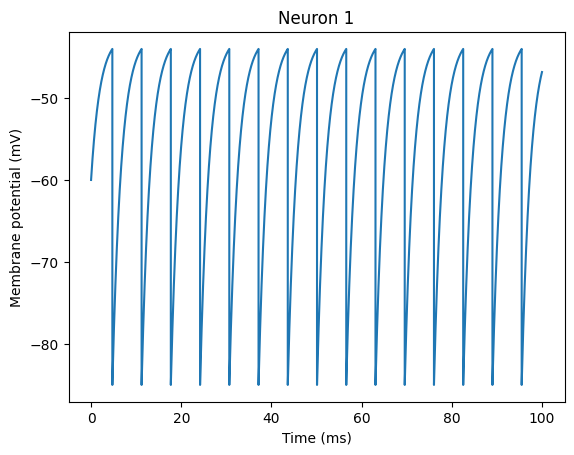

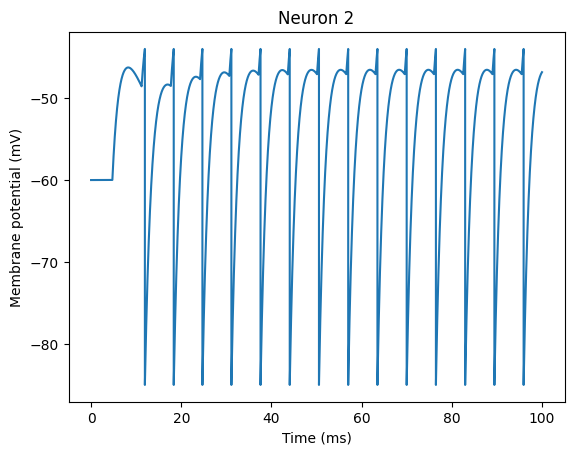

In [116]:
#A two neuron LIF model

def LIF2(I_inj1, I_inj2, w12, w21):
  #this function computes the response of two neurons specified by LIF models
  #INPUT: I_inj1, a real number, the constant current injected into the first neuron.
  #I_inj2, a real number, the constant current injected into the second neuron
  #w12, a real number, the connection strength from neuron 2 to neuron 1.
  #w21, a real number, the connection strength from neuron 1 to neuron 2.
  #OUTPUT Time_Vec, a real vector containing the time points of the simulation.
  # Vm_Vec1,  Vm_Vec2, real vectors, the membrane potentials of neuron 1 and 2 respectively.
  #gsyn_Vec1, gsyn_Vec2,real vectors, synaptic conductances in neurons 1 and 2 respectively.
  #Spike_time1,  real vector, the times of action potentials in neuron 1.
  #Spike1, a vector of integers, contains as many ones as the number of spikes of neuron 1.
  #Spike_time2, Spike2.  Same but for neuron 2.

  #Properties of the simulation
  Sim_dur=100#(ms) duration of the simulation
  dt=0.001#(ms) timestep of the simulation
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation
  time=0
  Time_Vec=[]

  #Properties of the first neuron
  Cm1=3#(pF) electric capacity of the cell
  gL1=1.5#(nS)
  EL1=-60#(mV)
  Etres1=-44#(mV)
  Ereset1=-85#(mV)
  Vm1=-60#(mV) initial value of membrane potential
  Vm_Vec1=[]

  #Properties of the second neuron
  Cm2=3#(pF) electric capacity of the cell.
  gL2=1#(nS)
  EL2=-60#(mV)
  Etres2=-44#(mV)
  Ereset2=-85#(mV)
  Vm2=-60#(mV) initial value of membrane potential
  Vm_Vec2=[]

  #Synaptic properties
  tauSyn=5#(ms)
  Esyn=0 #(mV)
  gsyn1=0#(nS)
  gsyn2=0#(nS)
  gsyn_Vec1=[]
  gsyn_Vec2=[]

  Spike_time1=[]
  Spike1=[]

  Spike_time2=[]
  Spike2=[]

  #Main Loop
  for j in range(Nstep):
    time=time+dt
    I1=I_inj1+gL1*(EL1-Vm1)+gsyn1*(Esyn-Vm1)
    I2=I_inj2+gL2*(EL2-Vm2)+gsyn2*(Esyn-Vm2)
    Vm1=Vm1+dt*I1/Cm1
    Vm2=Vm2+dt*I2/Cm2
    gsyn1=gsyn1-dt*gsyn1/tauSyn
    gsyn2=gsyn2-dt*gsyn2/tauSyn

    if Vm1>Etres1:
      Vm1=Ereset1
      Spike_time1.append(time)
      Spike1.append(1)
      gsyn2=gsyn2+w21

    if Vm2>Etres2:
      Vm2=Ereset2
      Spike_time2.append(time)
      Spike2.append(2)
      gsyn1=gsyn1+w12
    Vm_Vec1.append(Vm1)
    Vm_Vec2.append(Vm2)
    Time_Vec.append(time)
    gsyn_Vec1.append(gsyn1)
    gsyn_Vec2.append(gsyn2)

  return Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2

Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2(26.5, 0, 0, 0.6)


#Plotting the results
plt.plot(Time_Vec,Vm_Vec1)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 1')
plt.show()


plt.plot(Time_Vec,Vm_Vec2)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 2')
plt.show()




A **raster plot** is a practical way to visualise the data.

The time is on the x axis, the neuron index is on the y axis and each spike is represented by a black dot.

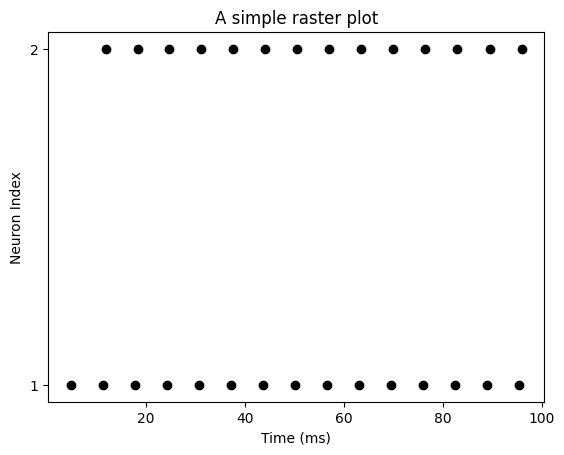

In [117]:
plt.plot(Spike_time1,Spike1,'ko',Spike_time2,Spike2,'ko')
plt.xlabel('Time (ms)')
plt.yticks((1,2))
plt.ylabel('Neuron Index')
plt.title('A simple raster plot')
plt.show()

We observe that there is a 1 to 1 ratio between the spikes of the first and the second neuron.

The spikes of the second neuron occur after a small delay.

It can be interesting to investigate the relation between the input strength and the firing frequencies.

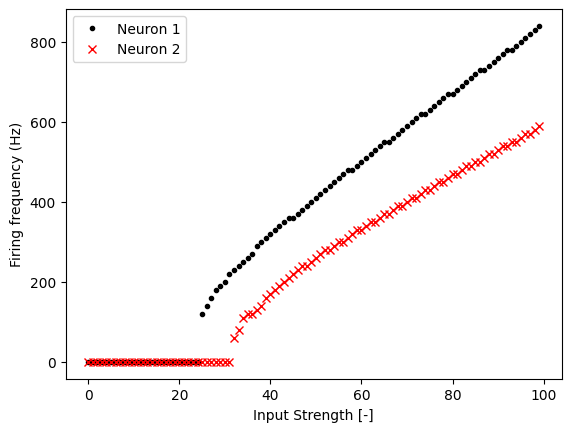

In [118]:
Input_Vec=[]
Freq1_Vec=[]
Freq2_Vec=[]

#Running the simulation for different values of injected currents
for j in range(100):
  Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2(j, 0, 0, 0.3)
  Input_Vec.append(j)
  Freq1_Vec.append(10*len(Spike1))
  Freq2_Vec.append(10*len(Spike2))

#Plotting the result
plt.plot(Input_Vec,Freq1_Vec,'.k',Input_Vec, Freq2_Vec,'xr')
plt.xlabel('Input Strength [-]')
plt.ylabel('Firing frequency (Hz)')
plt.legend(['Neuron 1','Neuron 2'])
plt.show()

**Remark:**  The firing rates in this example are unphysiologically large.  

One way to correct this is to add a *refractory period*.   This describes the fact that neurons cannot fire another action potential just after firing.

The existence of a refractory period is related to the dynamics of voltage-gated channels.

The refractory period lasts a few milliseconds (1-5 ms).

Also, the transmission of the action potential is not instantaneous. There is a  another delay due to the synaptic transmission itself.

In the next code, we will add a refractory period of 2 ms, we will  also add a transmission delay of 5 ms.


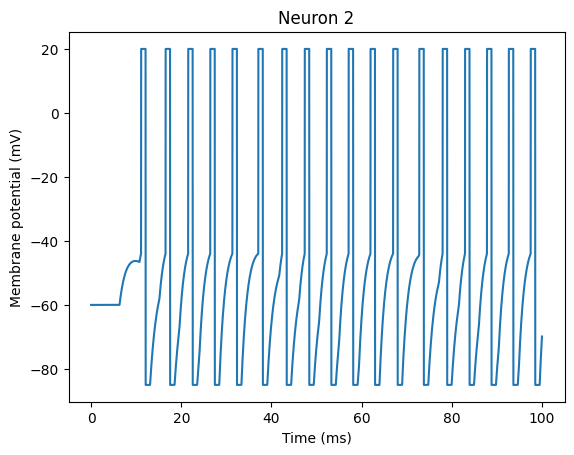

In [119]:
#A two neuron LIF model with refractory period and transmission delay

def LIF2ref(I_inj1, I_inj2, w12, w21):
  #this function computes the response of two neurons specified by LIF models taking into account a refractory period and a transmission delay.
  #INPUT: I_inj1, a real number, the constant current injected into the first neuron.
  #I_inj2, a real number, the constant current injected into the second neuron
  #w12, a real number, the connection strength from neuron 2 to neuron 1.
  #w21, a real number, the connection strength from neuron 1 to neuron 2.
  #OUTPUT Time_Vec, a real vector containing the time points of the simulation.
  # Vm_Vec1,  Vm_Vec2, real vectors, the membrane potentials of neuron 1 and 2 respectively.
  #gsyn_Vec1, gsyn_Vec2,real vectors, synaptic conductances in neurons 1 and 2 respectively.
  #Spike_time1,  real vector, the times of action potentials in neuron 1.
  #Spike1, a vector of integers, contains as many ones as the number of spikes of neuron 1.
  #Spike_time2, Spike2.  Same but for neuron 2.

  #Properties of the simulation
  Sim_dur=100#(ms) duration of the simulation
  dt=0.001#(ms) timestep of the simulation
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation
  time=0
  Time_Vec=[]

  #Properties of the first neuron
  Cm1=3#(pF) electric capacity of the cell.
  gL1=1.5#(nS)
  EL1=-60#(mV)
  Etres1=-44#(mV)
  Ereset1=-85#(mV)
  Vm1=-60#(mV) initial value of membrane potential
  ref1=2#(ms) refractory period for neuron 1
  Vm_Vec1=[]


  #Properties of the second neuron
  Cm2=3#(pF) electric capacity of the cell.
  gL2=1#(nS)
  EL2=-60#(mV)
  Etres2=-44#(mV)
  Ereset2=-85#(mV)
  Vm2=-60#(mV) initial value of membrane potential
  ref2=2#(ms) refractory period for neuron 2
  Vm_Vec2=[]

  #Synaptic properties
  tauSyn=5#(ms)
  Esyn=0#(mV)
  gsyn1=0#(nS)
  gsyn2=0#(nS)
  gsyn_Vec1=[]
  gsyn_Vec2=[]
  syn_delay=5#(ms) transmission delay
  Espike=20

  Spike_time1=[]
  Spike1=[]
  Last_Spike1=-100#(ms)
  Spike_Not_Sent1=[]


  Spike_time2=[]
  Spike2=[]
  Last_Spike2=-100#(ms)
  Spike_Not_Sent2=[]

  #Main Loop
  for j in range(Nstep):
    time=time+dt
    I1=I_inj1+gL1*(EL1-Vm1)+gsyn1*(Esyn-Vm1)
    I2=I_inj2+gL2*(EL2-Vm2)+gsyn2*(Esyn-Vm2)
    if ((time-Last_Spike1)<ref1) and ((time-Last_Spike1)>ref1/2):
      Vm1=Ereset1

    if (time-Last_Spike1)>ref1:
      Vm1=Vm1+dt*I1/Cm1

    if (time-Last_Spike2)>ref2:
      Vm2=Vm2+dt*I2/Cm2
    gsyn1=gsyn1-dt*gsyn1/tauSyn
    gsyn2=gsyn2-dt*gsyn2/tauSyn

    if ((Vm1>Etres1) and (Vm1<Espike)):
      Vm1=Espike
      Spike_time1.append(time)
      Spike1.append(1)
      Spike_Not_Sent1.append(time)
      Last_Spike1=time

    L=len(Spike_Not_Sent1)
    if L>0:
      if ((time-Spike_Not_Sent1[0])>=syn_delay) and ((time-Spike_Not_Sent1[0]-dt)<syn_delay):
        gsyn2=gsyn2+w21
        Spike_Not_Sent1.pop(0)

    if ((Vm2>Etres2) and (Vm2<Espike)):
      Vm2=Espike
      Spike_time2.append(time)
      Spike2.append(2)
      Last_Spike2=time

    if ((time-Last_Spike2)<ref2) and ((time-Last_Spike2)>ref2/2):
      Vm2=Ereset2

    L=len(Spike_Not_Sent2)
    if L>0:
      if ((time-Spike_Not_Sent2[0])>=syn_delay) and ((time-Spike_Not_Sent2[0]-dt)<syn_delay):
        gsyn1=gsyn1+w12
        Spike_Not_Sent2.pop(0)

    Vm_Vec1.append(Vm1)
    Vm_Vec2.append(Vm2)
    Time_Vec.append(time)
    gsyn_Vec1.append(gsyn1)
    gsyn_Vec2.append(gsyn2)

  return Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2

#Launching the simulation
Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2ref(50, 0, 0, 0.6)

#Plotting the result
plt.plot(Time_Vec,Vm_Vec1)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 1')
plt.show()

plt.plot(Time_Vec,Vm_Vec2)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Neuron 2')
plt.show()


Let's look at the impact of adding a refractory period and transmission delay the raster plot. `

*Hint:* it should decrease the firing rate.

In [120]:
plt.plot(Spike_time1,Spike1,'ko',Spike_time2,Spike2,'ko')
plt.xlabel('Time (ms)')
plt.yticks((1,2))
plt.ylabel('Neuron Index')
plt.title('A simple raster plot')
plt.show()

**Observation:** There is no longer a 1 to response of the second neuron to the activity of the first one.

Let's now look at the input-frequency relation for the model with refractory periods.

In [121]:
Input_Vec=[]
Freq1_Vec=[]
Freq2_Vec=[]

#Lauching the simulation for different values of injected current
for j in range(100):
  Time_Vec, Vm_Vec1, Vm_Vec2, gsyn_Vec1, gsyn_Vec2, Spike_time1, Spike1, Spike_time2, Spike2= LIF2ref(j, 0, 0, 0.6)
  Input_Vec.append(j)
  Freq1_Vec.append(10*len(Spike1))
  Freq2_Vec.append(10*len(Spike2))

#Plotting the results
plt.plot(Input_Vec,Freq1_Vec,'.k',Input_Vec, Freq2_Vec,'xr')
plt.xlabel('Input Strength [-]')
plt.ylabel('Firing frequency (Hz)')
plt.legend(['Neuron 1','Neuron 2'])
plt.show()


The refractory period indeed causes a reduction in firing frequency.

###  **LIF models for arbitrarily large networks**

Let's now move to a more complex and more interesting example.

We consider a network with 50 excitatory neurons and 50 inhibitory neurons.

We first consider a network with random excitatory and inhibitory connections and with random noisy input.

We first define a function that will take external inputs and connectivity matrix as arguments.

This function returns the activity of neurons.

In [122]:
import random as rnd

#A network LIF model with refractory period

def LIFNetwork(I_inj, ConnectMat,N_Neurons, Sim_dur, freq, noise_amp):
  #This function computes the activity of many neurons each described by a LIF model
  #This function also simulates the calcium fluorescence response
  #INPUT: I_inj, a real vector, the constant current injected in each neuron.
  #ConnectMat, a real matrix, the strength of connections between neurons
  #Sim_dur, a positive real number, the duration of the simulation
  #freq, a real number, the frequency of the sinusoidal input
  #noise_amp, the noise amplitude of the input
  #OUTPUT:Time_Vec, a real vector, the time points of the simulation
  #Vm_Vec, a real matrix, membrane potential of each neuron at each time point
  #gsynExc_Vec, gsynInh_Vec,real vectors, the synaptic conductances of each neuron at each time step
  #Spike_time, real matrix, the time of spike of each neuron.
  #Spike, a matrix of integer, the inidices of neurons spiking
  #Cal_Flu_Vec, a real matrix, the fluorescence of each neuron at each time step

  #Properties of the simulation
  dt=0.01#(ms) timestep of the simulation
  Nstep=math.floor(Sim_dur/dt)#Number of time steps in the simulation
  time=0
  Time_Vec=[]

  #Electrical properties of neurons
  Cm=3#(pF) electric capacity of the cell.
  gL=1.5#(nS)
  EL=-60#(mV)
  Etres=-44#(mV)
  Ereset=-85#(mV)
  Espike=20#(mV)
  ref=2#(ms) refractory period
  Vm_Vec=[]
  Vm=[]

  Sing_Spike_Cal=0.05#Relative fluoresce due to a single spike
  Cal_Flu_tau=100# (ms)Time constant of fluorescence

  Cal_Flu=[]
  Cal_Flu_Vec=[]

  for j in range(N_Neurons):
    Cal_Flu.append(0)
    Cal_Flu_Vec.append([])

  for j in range(N_Neurons):
    Vm.append(-60)#(mV) initial value of membrane
    Vm_Vec.append([])


  #Synaptic properties
  tauSynExc=5#(ms)
  tauSynInh=10#(ms)
  EsynExc=0
  EsynInh=-70
  syn_delay=5#(ms) transmission delay
  gsynExc=[]
  gsynInh=[]
  gsynExc_Vec=[]
  gsynInh_Vec=[]
  Spike_time=[]
  Spike=[]
  Last_Spike=[]#-100#(ms)
  Spike_Not_Sent=[]

  for j in range(N_Neurons):
    gsynExc.append(0)
    gsynInh.append(0)
    gsynExc_Vec.append([])
    gsynInh_Vec.append([])
    Last_Spike.append(-100)
    Spike.append([])
    Spike_Not_Sent.append([])
    Spike_time.append([])


  #Main Loop
  for j in range(Nstep):
    time=time+dt
    I=[]
    for k in range(N_Neurons):
      Inp=I_inj[k]*(1+np.sin(2*np.pi*time*freq/1000))*(1+noise_amp*(rnd.random()-0.5))
      I.append(Inp+gL*(EL-Vm[k])+gsynExc[k]*(EsynExc-Vm[k])+gsynInh[k]*(EsynInh-Vm[k]))

      if (((time-Last_Spike[k])>ref/2) and ((time-Last_Spike[k])<ref)):
        Vm[k]=Ereset

      if (time-Last_Spike[k])>ref:
        Vm[k]=Vm[k]+dt*I[k]/Cm

      gsynExc[k]=gsynExc[k]-dt*gsynExc[k]/tauSynExc
      gsynInh[k]=gsynInh[k]-dt*gsynInh[k]/tauSynInh

      Cal_Flu[k]=Cal_Flu[k]-dt*Cal_Flu[k]/Cal_Flu_tau

      if ((Vm[k]>Etres) and (Vm[k]<Espike)):
        #Vm[k]=Ereset
        Vm[k]=Espike
        Spike_time[k].append(time)
        Spike[k].append(k)
        Spike_Not_Sent[k].append(time)
        Last_Spike[k]=time
        Cal_Flu[k]=Cal_Flu[k]+Sing_Spike_Cal


      L=len(Spike_Not_Sent[k])
      if L>0:
        if ((time-Spike_Not_Sent[k][0])>=syn_delay) and ((time-Spike_Not_Sent[k][0]-dt)<syn_delay):

          for s in range(N_Neurons):
            if ConnectMat[s][k]>0:
              gsynExc[s]=gsynExc[s]+ConnectMat[s][k]
            if ConnectMat[s][k]<0:
              gsynInh[s]=gsynInh[s]-ConnectMat[s][k]

          Spike_Not_Sent[k].pop(0)

      Vm_Vec[k].append(Vm[k])
      Cal_Flu_Vec[k].append(Cal_Flu[k])
      gsynExc_Vec[k].append(gsynExc[k])
      gsynInh_Vec[k].append(gsynInh[k])
    Time_Vec.append(time)

  return Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike, Cal_Flu_Vec


Let's define the connectivity matrix and the input vector.

In [123]:
import numpy as np

#Define the connectivity matrix

N_Neurons=50

p=0.2
pexc=0.5
ConnectMat=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons):
  for k in range(N_Neurons):
    R1=rnd.random()
    if R1<p:
      R2=rnd.random()
      if R2<pexc:
        ConnectMat[k][j]=0.1
      if R2>pexc:
        ConnectMat[k][j]=-0.1



#Define the input vector
Inp=np.zeros(N_Neurons)
for j in range(N_Neurons):
  pinp=0.5
  R=rnd.random()
  if R<pinp:
    Inp[j]=25

#Display the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()



Let's now run the simulation

In [124]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike, Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,500,0,0.2)

And generate the raster plot

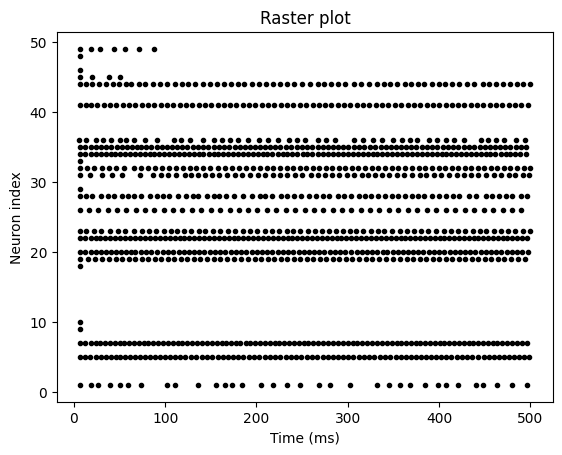

In [125]:
#Generating the raster plot
for j in range(50):
  plt.plot(Spike_time[j],Spike[j],'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()


We observe a wide variety of behaviours over the neurons.

Some fire with high frequency, some don't fire at all, and interestingly some of irregular responses.

We can also display a heatmap of the neurons membrane potential.

In [126]:
plt.pcolormesh(Time_Vec,range(50),Vm_Vec)
plt.colorbar()
plt.title('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

In practice, it is difficult to measure individul spikes or membrane potential of each neuron in a network.

Measurement of neural activity is often made indirectly with the use of fluorescent dyes that are sensitive to calcium concentration.

Intracellular calcium concentration increases sharply just after an action potential, it can thus be used as a proxy for neural activity

Since the dynamics of calcium concentration is slower, it corresponds to a time smoothed representation of neural activity.

In [127]:
plt.pcolormesh(Time_Vec,range(50),Cal_Flu_Vec,cmap='hot')
plt.title('Fluorescence (a. u.)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

This type of completely random neural network is very unphysiological.

We now consider a multi layer network, in which neurons of a layer are randomly connected to the neurons of the next layer.

This is a feedforward network.

We consider only excitatory connections.

We consider a sinusoidal input injected in neurons of the first layer.

In [128]:
#Define the connectivity matrix

N_Neurons_L1=20
N_Neurons_L2=20
N_Neurons_L3=20
N_Neurons_L4=20
N_Neurons_L5=20
N_Neurons_L6=20

N_Neurons=N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+N_Neurons_L5+N_Neurons_L6
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
strength=0.05
for j in range(N_Neurons_L1):
  for k in range(N_Neurons_L2):
    ConnecMatExc[N_Neurons_L1+k][j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L2):
  for k in range(N_Neurons_L3):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+k][N_Neurons_L1+j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L3):
  for k in range(N_Neurons_L4):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+k][N_Neurons_L1+N_Neurons_L2+j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L4):
  for k in range(N_Neurons_L5):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+k][N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+j]=strength+strength*(rnd.random()-0.5)

for j in range(N_Neurons_L5):
  for k in range(N_Neurons_L6):
    ConnecMatExc[N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+N_Neurons_L5+k][N_Neurons_L1+N_Neurons_L2+N_Neurons_L3+N_Neurons_L4+j]=strength+strength*(rnd.random()-0.5)


ConnecMatInh=np.zeros((N_Neurons,N_Neurons))

ConnectMat=ConnecMatExc-ConnecMatInh

#Define the input vector
Inp=np.zeros(120)
for j in range(N_Neurons_L1):
  Inp[j]=15

#Display the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()


We can now launch the simulation

In [129]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike, Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,400,10,0)

And generate the raster plot

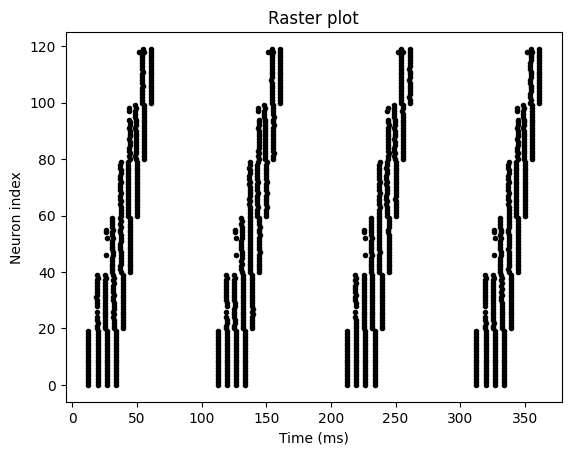

In [130]:
#Generating the raster plot
for j in range(120):
  plt.plot(Spike_time[j],Spike[j],'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()

We see the signal propagating through the layers of the network.

We can also display a heatmap of the membrane potential of all neurons.

In [131]:
plt.pcolormesh(Time_Vec,range(120),Vm_Vec)
plt.colorbar()
plt.title('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

And the simulated fluorescence response

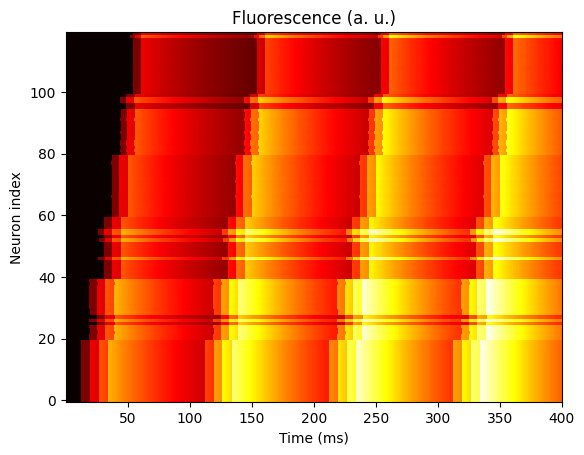

In [132]:
plt.pcolormesh(Time_Vec,range(120),Cal_Flu_Vec,cmap='hot')
plt.title('Fluorescence (a. u.)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

We now consider a network with **an inhibitory feedback loop**.  

We divide the neurons in excitatory and inhibitory neurons.

The connectivity matrix describing the network is a *stochastic block model*.

An external current is injected in the excitatory neurons.

Excitatory neurons excite inhibitory ones.

Inhibitory neurons send inhibitory connections to excitatory ones.

There is no connections between two excitatory neurons or between two inhibitory neurons.

We update the connection matrix and injected currents

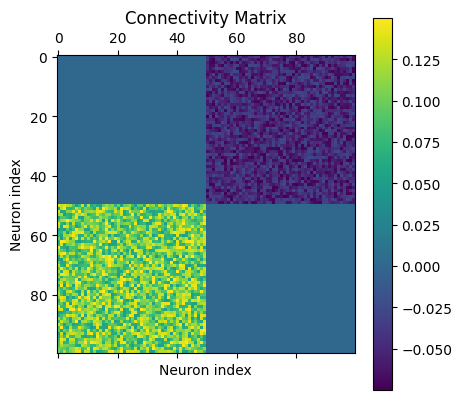

In [133]:
#Updating the connection matrix
N_Neurons_Exc=50
N_Neurons_Inh=50
N_Neurons=N_Neurons_Exc+N_Neurons_Inh
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatExc[N_Neurons_Exc+k][j]=0.1+0.1*(rnd.random()-0.5)

ConnecMatInh=np.zeros((N_Neurons,N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatInh[j][N_Neurons_Inh+k]=0.05+0.05*(rnd.random()-0.5)
ConnectMat=ConnecMatExc-ConnecMatInh

#Defining the input vector
Inp=np.zeros(100)
for j in range(50):
  Inp[j]=26

#Displaying the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()


We can now launch the simulation

In [134]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike,Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,400,0,0)

And plot the results

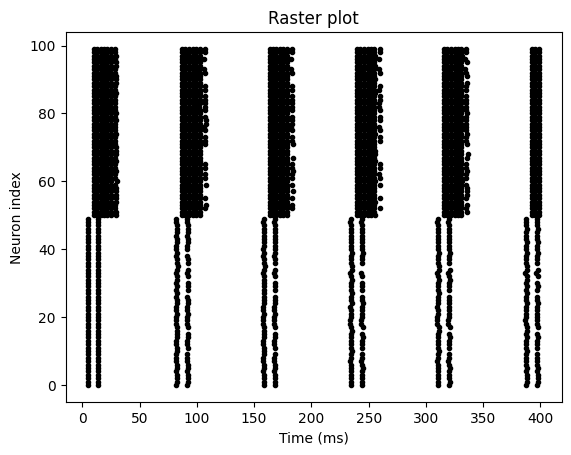

In [135]:
#Generating the raster plot
for j in range(100):

  A=Spike_time[j]
  B=Spike[j]
  plt.plot(A,B,'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()

As we did in the section on the bursting Morris-Lecar model, we observed **bursting**.

However, in this example, the bursting is not due to intrinsec neural properties but to network effects.

The presence of an **inhibitory feedback loop** often causes **oscillations** that is alternance between periods of activity and neural silence.

We can also display a heatmap of the membrane potential of all neurons.

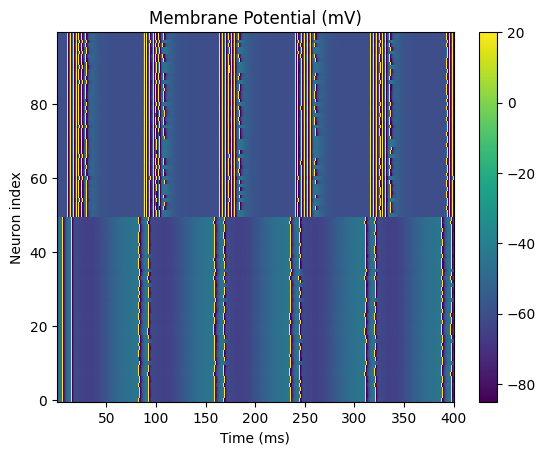

In [136]:
plt.pcolormesh(Time_Vec,range(100),Vm_Vec)
plt.colorbar()
plt.title('Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

We can also plot the simulated fluorescence response

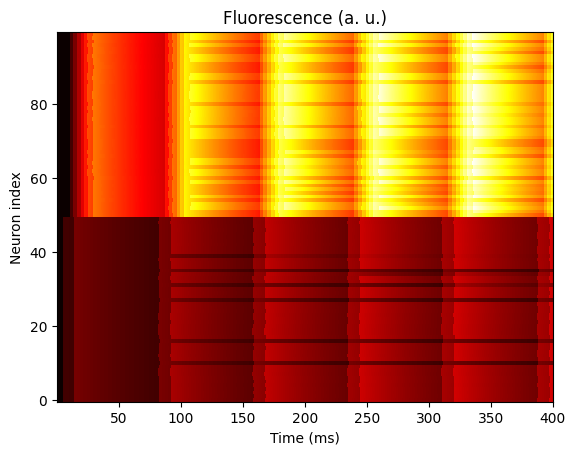

In [137]:
plt.pcolormesh(Time_Vec,range(100),Cal_Flu_Vec,cmap='hot')
plt.title('Fluorescence (a. u.)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.show()

Let's decrease the strength of inhibitory connections and see what happens.

First, we redefine the connection matrix and input vector.

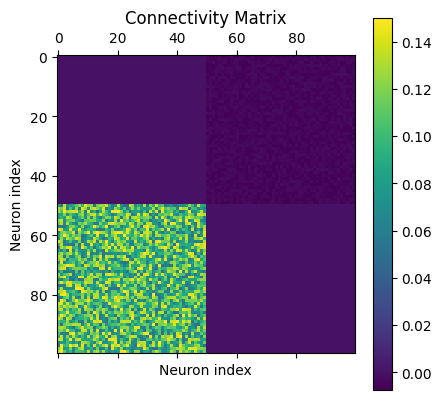

In [138]:
#Updating the connection matrix
N_Neurons_Exc=50
N_Neurons_Inh=50
N_Neurons=N_Neurons_Exc+N_Neurons_Inh
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatExc[N_Neurons_Exc+k][j]=0.1+0.1*(rnd.random()-0.5)

ConnecMatInh=np.zeros((N_Neurons,N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatInh[j][N_Neurons_Inh+k]=0.005+0.005*(rnd.random()-0.5)
ConnectMat=ConnecMatExc-ConnecMatInh

#Defining the input vector
Inp=np.zeros(100)
for j in range(50):
  Inp[j]=26

#Displaying the connectivity matrix
plt.matshow(ConnectMat)
plt.colorbar()
plt.xlabel('Neuron index')
plt.ylabel('Neuron index')
plt.title('Connectivity Matrix')
plt.show()

Let's relaunch the simulation

In [139]:
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike,Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,400,0,0)

And plot the results

In [140]:
#Generating the raster plot
for j in range(100):

  A=Spike_time[j]
  B=Spike[j]
  plt.plot(A,B,'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()

The bursting behaviour still occurs.

Oscillations still occur but they are now faster.

Let's try with no inhibition at all.

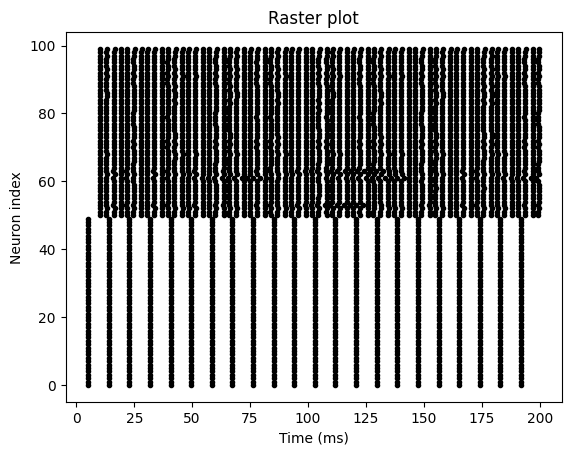

In [141]:
#Upating the connectivity matrix
N_Neurons_Exc=50
N_Neurons_Inh=50
N_Neurons=N_Neurons_Exc+N_Neurons_Inh
ConnecMatExc=np.zeros((N_Neurons, N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatExc[N_Neurons_Exc+k][j]=0.1+0.1*(rnd.random()-0.5)

ConnecMatInh=np.zeros((N_Neurons,N_Neurons))
for j in range(N_Neurons_Exc):
  for k in range(N_Neurons_Inh):
    ConnecMatInh[j][N_Neurons_Inh+k]=0.0+0.0*(rnd.random()-0.5)
ConnectMat=ConnecMatExc-ConnecMatInh

#Defining the input vector
Inp=np.zeros(100)
for j in range(50):
  Inp[j]=26

#Relaunching the simulation
Time_Vec, Vm_Vec, gsynExc_Vec, gsynInh_Vec, Spike_time, Spike,Cal_Flu_Vec=LIFNetwork(Inp,ConnectMat,N_Neurons,200,0,0)

#Generating the raster plot
for j in range(100):

  A=Spike_time[j]
  B=Spike[j]
  plt.plot(A,B,'k.')

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster plot')

plt.show()


The excitatory neurons fire at a steady frequency of about 100 Hz.

The inhibitory neurons respond in a 3 to 1 ratio.

We have lost bursting and oscillations.

#### **Exercices related to LIF models**


1. Change the connection probability from *p=0.2* to values of your choosing.

What is the impact impact on the connectivity matrix?  What is the impact on the raster plot?

2. In this example, a connection had a probability of 1/2 to be excitatory and a probability of 1/2 to be inhibtory as specified by the value of pexc. Change the value of pexc.  What is the impact on the connectivity matrix?  What is the impact on the raster plot?
      

### Izikevich model


LIF models have some limitations.

They can only describe constant rate firing or quiet states.

They cannot describe single cell bursting nor many other important firing patterns.

The **Izikevich model** is a discontinuous two variable model designed to overcome these limitations.

The **Izikevich model** is specified by
$$
\frac{dV}{dt}=0.04V^2+5V+140-u+I
$$
$$
\frac{du}{dt}=a(bV-u)
$$
If $V=30$ mV, $V\leftarrow c$ and $u\leftarrow u+d$.

The variable $V$ stands for the membrane potential and $u$ is a slow recovery variable.  The constant $a,b,c,d$ will determined properties of cells firing.

The rules with $\leftarrow$ mean that when the membrane potential reaches the threshold value of 30 mV, we assume that the neuron emits an action potential.  When the neuron emits an action potential, the membrane potential is resetted to $c$ while the recovery variable $u$ increases by a discontinuous step of size $d$.

The model is phenomelogical as the variable $u$ doesn't correspond to a biological reality.

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def Izikevich(a,b,c,d,I):
  #This function computes the solution to the Izikevich model
  #INPUT: a,b,c,d real numbers defining the parameters of the model
  #I, the current injected into the neuron
  #OUTPUT:
  #Tvec, a vector containing the time points on which the model is solved
  #Vvec, a vector containing the values of the membrane potential
  #uVec, a vector containing the values of the recovery variable
  #SpikeVec, a binary vector, 0 means no spike occurs at a given time point, 1 means a spike occurs

  Duration=1000
  dt=0.01
  Nstep=np.floor(Duration/dt)
  Tvec=[]
  Vvec=[]
  uVec=[]
  SpikeVec=[]
  V=-60
  u=0
  time=0
  for j in range(int(Nstep)):
    dV=0.04*V*V+5*V+140-u+I
    du=a*(b*V-u)
    s=0
    V=V+dV*dt
    u=u+du*dt
    if V>30:
      V=c
      u=u+d
      s=1
    time=time+dt
    Tvec.append(time)
    Vvec.append(V)
    uVec.append(u)
    SpikeVec.append(s)
  return Tvec,Vvec,uVec,SpikeVec


Let's run a first example with an injected current equal to 10


In [143]:
#Running the simulation
Tvec,Vvec,uVec,SpikeVec=Izikevich(0.02,0.2,-65,8,10)

#plotting the results
plt.plot(Tvec,Vvec)
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Izikevich model (Iinj=10)')
plt.show()

This example leads to regular spiking.  By changing the values of the parameters $a$, $b$, $c$, $d$, we can obtain other types of firing example.

By setting $a=0.02$, $b=0.2$, $c=-50$, $d=2$, we obtain bursting activity.

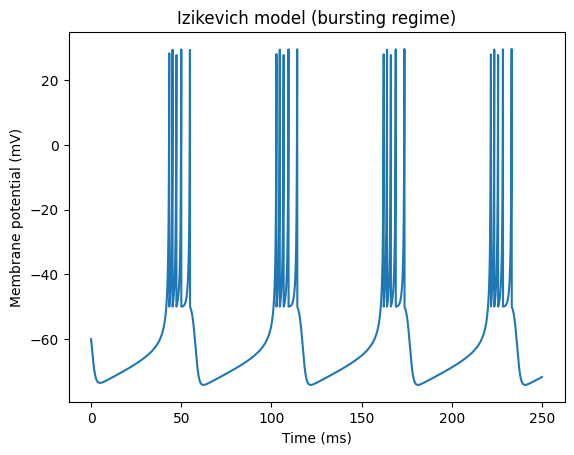

In [144]:
Tvec,Vvec,uVec,SpikeVec=Izikevich(0.02,0.2,-50,2,10)
plt.plot(Tvec[0:25000],Vvec[0:25000])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Izikevich model (bursting regime)')
plt.show()

We obtain bursts of 5 spikes separated by periods of 75 ms of silence.

We end this workshop by simulating the activity of a network of Izikevich neurons.   

 The description of the Izikevich model and the details of the following simulation can be find in https://www.izhikevich.org/publications/spikes.pdf which is a high impact paper by Izikevich himself.

** Remark:**  The code in the Izikevich paper is given in MATLAB so we had to adapt it for Python.  We also reduced the time step for better integration.

The model has 800 excitatory neurons and 200 inhibitory neurons


We first define the connectivity matrix

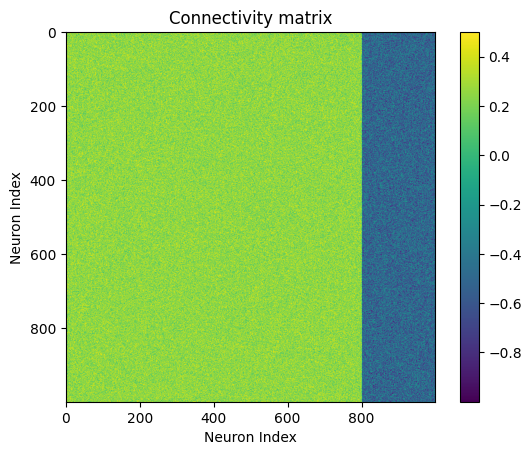

In [145]:
import random
import numpy as np
Ne=800
Ni=200

S=np.zeros((Ne+Ni,Ne+Ni))
for j in range(Ne+Ni):
  for k in range(Ne):
    S[j][k]=0.5*random.uniform(0,1)

for j in range(Ne+Ni):
  for k in range(Ni):
    S[j][k+Ne]=-random.uniform(0,1)


plt.imshow(S)
plt.xlabel('Neuron Index')
plt.ylabel('Neuron Index')
plt.title('Connectivity matrix')
plt.colorbar()
plt.show()



The parameters $a$, $b$, $c$, $d$ and the initial conditions have a random component. We now define them.

In [146]:
re=[]
for j in range(Ne):
  re.append(random.uniform(0,1))

ri=[]
for j in range(Ni):
  ri.append(random.uniform(0,1))

a=[]
b=[]
c=[]
d=[]

for j in range(Ne):
  a.append(0.02)
  b.append(0.2)
  c.append(-65+15*re[j]*re[j])
  d.append(8-6*re[j]*re[j])

for j in range(Ni):
  a.append(0.02+0.08*ri[j])
  b.append(0.25-0.05*ri[j])
  c.append(-65)
  d.append(2)


V=[]
u=[]
for j in range(Ne+Ni):
  V.append(-65)
  u.append(-65*b[j])


We now solve the model itself.

This might take a few minutes

In [147]:
firingtimes=[]
firingindices=[]
Vexample=[]
timevec=[]
dt=0.01

for t in range(50000):
  timevec.append(dt*t)
  fired=[]
  #Resetting the values of V and u for spiking neurons
  for j in range(Ne+Ni):
    if V[j]>30:
      fired.append(j)
      firingtimes.append(dt*t)
      firingindices.append(j)
      V[j]=c[j]
      u[j]=u[j]+d[j]

  #updating membrane potential for excitatory neurons
  for j in range(Ne):
    I=10*random.uniform(0,1)
    for k in fired:
      I=I+S[j][k]
    V[j]=V[j]+(dt/2)*(0.04*V[j]*V[j]+5*V[j]+140-u[j]+I)
    V[j]=V[j]+(dt/2)*(0.04*V[j]*V[j]+5*V[j]+140-u[j]+I)
    u[j]=u[j]+dt*a[j]*(b[j]*V[j]-u[j])

  #updating membrane potential for inhibitory neurons
  for j in range(Ni):
    I=4*random.uniform(0,1)
    for k in fired:
      I=I+S[Ne+j][k]
    V[Ne+j]=V[Ne+j]+(dt/2)*(0.04*V[Ne+j]*V[Ne+j]+5*V[Ne+j]+140-u[Ne+j]+I)
    V[Ne+j]=V[Ne+j]+(dt/2)*(0.04*V[Ne+j]*V[Ne+j]+5*V[Ne+j]+140-u[Ne+j]+I)
    u[Ne+j]=u[Ne+j]+dt*a[Ne+j]*(b[Ne+j]*V[Ne+j]-u[Ne+j])
  Vexample.append(V[0])



Let's display the raster plot

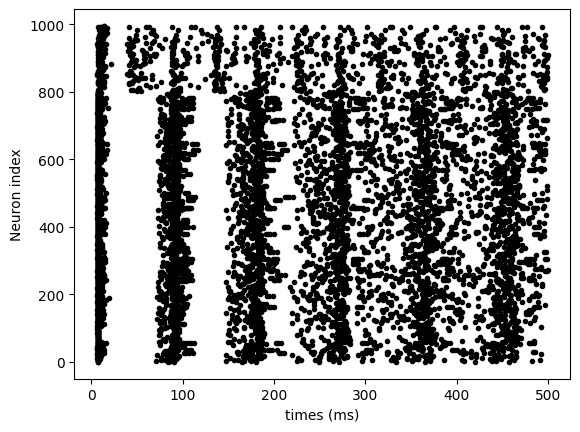

In [148]:
plt.plot(firingtimes,firingindices,'.k')
plt.xlabel('times (ms)')
plt.ylabel('Neuron index')
plt.show()

Let's plot the membrane potential of a neuron as an example

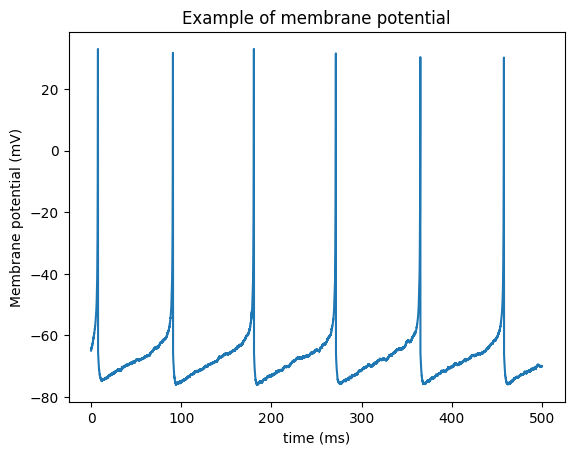

In [149]:
plt.plot(timevec,Vexample)
plt.xlabel('time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Example of membrane potential')
plt.show()

From the raster plot, one can extract the **interspike interval (ISI)histogram**.

The ISI histogram is the histogram of all the intervals between consecutive spikes of the same neuron.

This histogram can reveal information on the content frequency of the network activity.

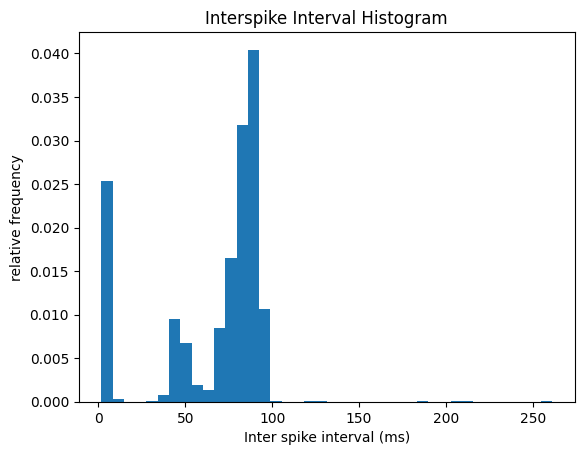

In [150]:
#Computing a vector ISI that contains the values of all the interspike intervals
SpikeTest=np.zeros(1000);
LastSpike=np.zeros(1000);
count=0;
ISI=np.zeros(len(firingtimes))
for j in range(len(firingtimes)):
    if SpikeTest[firingindices[j]]==1:
        count=count+1
        ISI[count]=firingtimes[j]-LastSpike[firingindices[j]]
        LastSpike[firingindices[j]]=firingtimes[j]

    if SpikeTest[firingindices[j]]==0:
        SpikeTest[firingindices[j]]=1
        LastSpike[firingindices[j]]=firingtimes[j]


ISI=ISI[1:count]

#Plotting the histogram
plt.hist(ISI, bins=40,density=True)
plt.xlabel('Inter spike interval (ms)')
plt.ylabel('relative frequency')
plt.title('Interspike Interval Histogram')
plt.show()

The peak observed around 75 ms corresponds to the temporal distance between two consecutive bursts.

The peak observed around 5 ms corresponds to the temporal distance between two spikes in the same burst.

The peak near 5 ms is smaller since some neurons emit a single spike per burst.

#### **Exercices related to the Izikevich model**

Open the paper: https://www.izhikevich.org/publications/spikes.pdf

Modify the parameters of our Izikevich function and replicate the different spiking patterns shown in figure 2 of the paper.

## Finite state models

Another approach to model neural activity consists in to dividing the states of the neurons into a finite set.

We will present two types of models: *Finite automata* and *Wilson-Cowan model*.

One can divide the neuron activity into either one of these three states:

 **Active**, **Susceptible** and **Refractory**.

The **active** state corresponds to a state in which the neuron emits action potentials.
  
The **refractory** state corresponds to the state just after the neuron emitted an action potential.  We assume that neurons in refractory states cannot become active.

In the **susceptible** state, neurons can become active if the receive enough connections from neurons in active state.



### The Wilson-Cowan model

The Wilson Cowan is a **population model**.  

In this sense, it doesn't describe the activity of individual neurons.

Rather, neurons are divided into populations that are assumed to  be homogeneous.

The one population version of the model is given by
$$
\frac{dA}{dt}=-\alpha A+S\sigma(wA-\theta),
$$
$$
\frac{dS}{dt}=\beta R-S\sigma(wA-\theta),
$$
$$
\frac{dR}{dt}=\alpha A-\beta R.
$$

As written, the model has three variables but one is redundant since
$$
A+R+I=1.
$$
The model can thus be written as
$$
\frac{dA}{dt}=-\alpha A+S\sigma(wA-\theta),
$$
$$
\frac{dS}{dt}=\beta(1-S-A)-S\sigma(wA-\theta).
$$

Finally, the proportion of neurons in refractory state is often neglected.

This gives rise to a one dimensional model defined by the equation
$$
\frac{dA}{dt}=-\alpha A+(1-A)\sigma(wA-\theta).
$$

The sigmoid function
$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
is used to describe the activiation function of neurons.

It is increasing, continuous, differentiable and bounded.

**Excercice (for the math lovers)**.  Show that
$$
\sigma'(x)=\sigma(x)(1-\sigma(x)).
$$

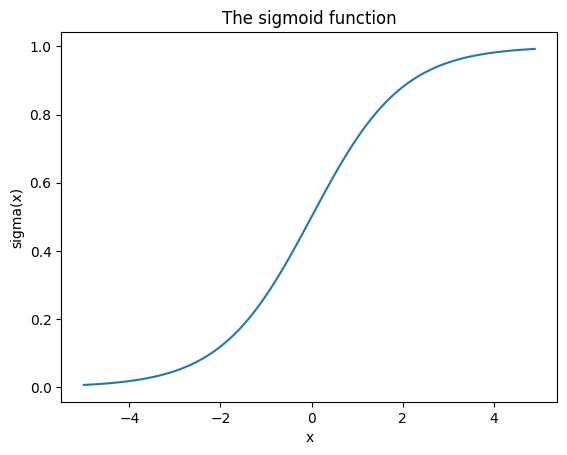

In [151]:
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import math
import numpy as np

def sigma(x):
  #computes the sigma function
  #INPUT: x, a real number
  #OUTPUT: sig, a real number between 0 and 1
  sig=1/(1+math.e**(-x))
  return sig

xvec=[]
sigvec=[]
for j in range(100):
  x=(j/10)-5
  sig=sigma(x)
  xvec.append(x)
  sigvec.append(sig)

plt.plot(xvec,sigvec)
plt.xlabel('x')
plt.ylabel('sigma(x)')
plt.title('The sigmoid function')
plt.show()



We now define the right-hand side of the one dimensional Wilson-Cowan model

In [152]:
def WCmodel(y,t):
  #This function computes the right-hand-side of the one dimensional Wilson Cowan model
  #INPUT: y, the proportion of neurons in active state
  #t, time (is not used but has to be specified for ODE models)
  #OUTPUT:
  #dydt, rate of change of the active proportion
  alpha=1#the inactivation rate
  w=1#connection weigth
  theta=0.5#threshold
  s=0.1#slope of the activation function
  beta=4#activatio rate
  dydt=-alpha*y+beta*(1-y)*sigma((w*y-theta)/s)
  return dydt

When this function is equal to zero, the proportion of active neurons will not change.

In this case, we have a **steady-state**.

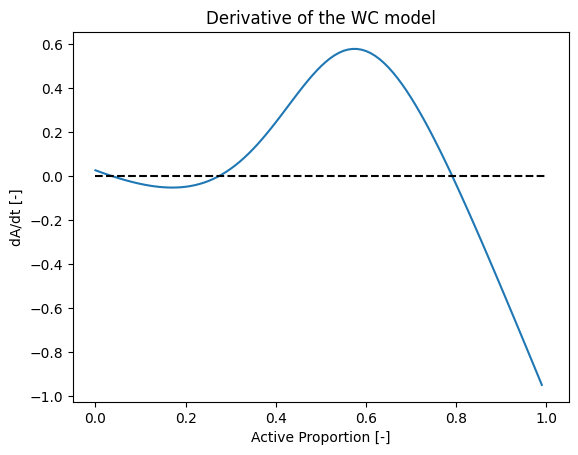

In [153]:
#We compute the rhs of the WC model for different values of active proportion
yvec=[]
dydtvec=[]
for j in range(100):
  y=0.01*j
  yvec.append(y)
  dydtvec.append(WCmodel(y,0))

#we plot the results
plt.plot(yvec,dydtvec,[0,1],[0,0],'--k')
plt.xlabel('Active Proportion [-]')
plt.ylabel('dA/dt [-]')
plt.title('Derivative of the WC model')
plt.show()


We observe 3 steady state values.

The leftmost and rightmost steady states are **stable**.  The center one is **unstable**.

We call this situation **bistability**.

We simulate the Wilson Cowan model for different initial values.  

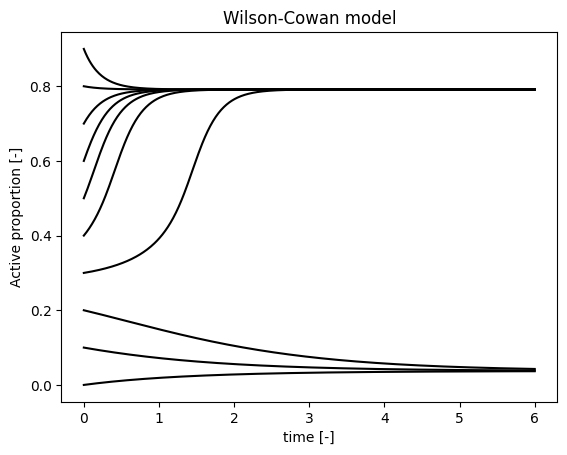

In [154]:
t = np.linspace(0,6,500)
for j in range(10):
  yinit=0.1*j
  y = odeint(WCmodel,yinit,t)
  plt.plot(t,y,'-k')
  plt.xlabel('time [-]')
  plt.ylabel('Active proportion [-]')

plt.title('Wilson-Cowan model')
plt.show()

We observe that depending on the initial state, the model can converge to either one of two stable steady-state.

**Exercice.**  Launch the above code with more initial values.  Find the separation between trajectories that converge to the lower steady state and trajectories that converge to the upper steady state.

We now consider two population.  A population of **excitatory** neurons and a population of **inhibitory** neurons.

In [155]:
def WCmodelTwoPop(y,t,Ie,Ii):
  #A function that computes the right hand side of a two dimension WC model
  #INPUT:
  #y a vector of length 2 describing the state of the model
  #y[0] the proportion of active neurons in the excitatory population
  #y[1] the proportion of active neurons in the inhibitory population
  #t, a real number, time
  #Ie, a real number, external current injected in the excitatory population
  #Ii, a real number, external current injected in the inhibitory population
  #OUTPUT:
  #dydt, a real vector of length 2, the time derivative of the system
  dydt=np.zeros(2)
  Aexc=y[0]
  Ainh=y[1]
  alpha=1
  wei=-0.8
  wie=1
  wii=0
  wee=1
  InputExc=Aexc*wee+Ainh*wei
  InputInh=Aexc*wie+Ainh*wii
  theta=0.5
  s=0.1
  dydt[0]=5*(-alpha*Aexc+4*(1-Aexc)*sigma((InputExc-theta+Ie)/s))
  dydt[1]=-alpha*Ainh+4*(1-Ainh)*sigma((InputInh-theta)/s)
  return dydt

We now define functions that will compute the **nullclines** of the 2 population WC model.

In the phase plane $A_e$, $A_i$, the nullclines correspond to curves where $dA_e/dt=0$ and $dA_i/dt=0$.

In [156]:
def AI_Nullcline(Ie,Ii):
  #This function computes the nullcline of A_i in the two population WC moodel
  #INPUT:
  #Ie,Ii real numbers, injected current in excitatory and inhibitory populations
  #OUTPUT: Aexc, Ainh two vectors. Pairs [Aexc[j],Ainh[j]] correspond to points on the nullcline of A_i
  Ainh=[]
  Aexc=[]
  test=0
  for j in range(100):
    AI=0.01*j
    old_dydt=0
    for k in range(1000):
      AE=0.001*k
      dydt=WCmodelTwoPop([AE,AI],0,Ie,Ii)
      test=dydt[1]*old_dydt
      if test<0:
        Aexc.append(AE)
        Ainh.append(AI)
      old_dydt=dydt[1]
  test=0

  return Aexc, Ainh

def AE_Nullcline(Ie,Ii):
  #This function computes the nullcline of A_e in the two population WC moodel
  #INPUT:
  #Ie,Ii real numbers, injected current in excitatory and inhibitory populations
  #OUTPUT: Aexc, Ainh two vectors. Pairs [Aexc[j],Ainh[j]] correspond to points on the nullcline of A_e
  Ainh=[]
  Aexc=[]
  test=0
  for j in range(100):
    AE=0.01*j
    old_dydt=0
    for k in range(2000):
      AI=0.001*k-1
      dydt=WCmodelTwoPop([AE,AI],0,Ie,Ii)
      test=dydt[0]*old_dydt
      if test<0:
        Aexc.append(AE)
        Ainh.append(AI)
      old_dydt=dydt[0]
  test=0

  return Aexc, Ainh


We compute and plot the nullclines.

We first launch the simulations in a case where there is no injected current.

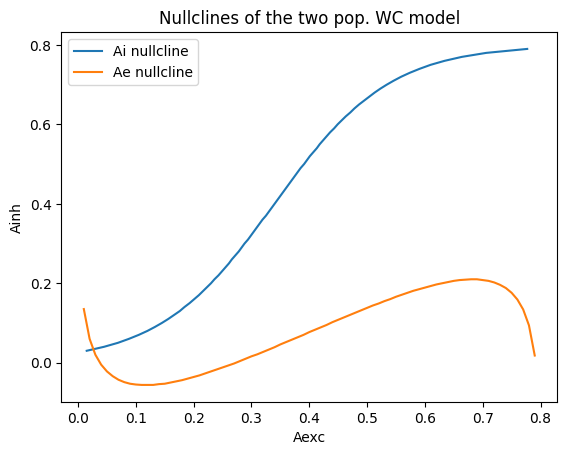

In [157]:
#Running the simulations
Ae_AiNullcline,Ai_AiNullcline=AI_Nullcline(0,0)
Ae_AeNullcline,Ai_AeNullcline=AE_Nullcline(0,0)

#plotting the results
plt.plot(Ae_AiNullcline,Ai_AiNullcline,Ae_AeNullcline,Ai_AeNullcline)
plt.legend(['Ai nullcline','Ae nullcline'])
plt.xlabel('Aexc')
plt.ylabel('Ainh')
plt.title('Nullclines of the two pop. WC model')
plt.show()


We see a single fixed point. The situation is similar to what we saw with the Morris Lecar model

We can predict that the solution will converge to this fixed point.

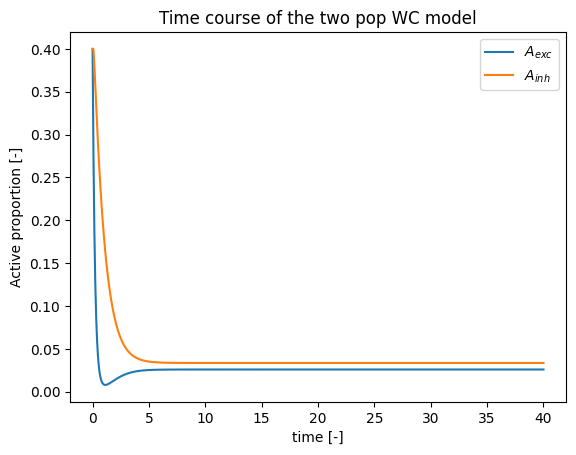

In [158]:
t = np.linspace(0,40,500)
yinit=[.4,0.4]
Ie=0
Ii=0

y = odeint(WCmodelTwoPop,yinit,t, args=(Ie,Ii))
plt.plot(t,y[:,0],t,y[:,1])
plt.xlabel('time [-]')
plt.ylabel('Active proportion [-]')
plt.legend(['$A_{exc}$','$A_{inh}$'])
plt.title('Time course of the two pop WC model')
plt.show()

We repeat this last simulation but now we inject an external current in the excitatory population.

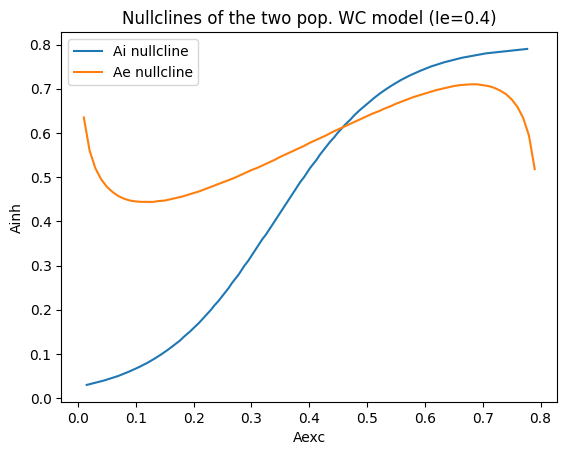

In [159]:
#Running the simulations
Ae_AiNullcline,Ai_AiNullcline=AI_Nullcline(0.4,0)
Ae_AeNullcline,Ai_AeNullcline=AE_Nullcline(0.4,0)

#plotting the results
plt.plot(Ae_AiNullcline,Ai_AiNullcline,Ae_AeNullcline,Ai_AeNullcline)
plt.legend(['Ai nullcline','Ae nullcline'])
plt.xlabel('Aexc')
plt.ylabel('Ainh')
plt.title('Nullclines of the two pop. WC model (Ie=0.4)')
plt.show()

Again, the simulation is similar to what we observed in the ML model.

The intersection occurs betwen the local mimum and the local maximum of the  V  nullcline.

We predict oscillations in the solutions.

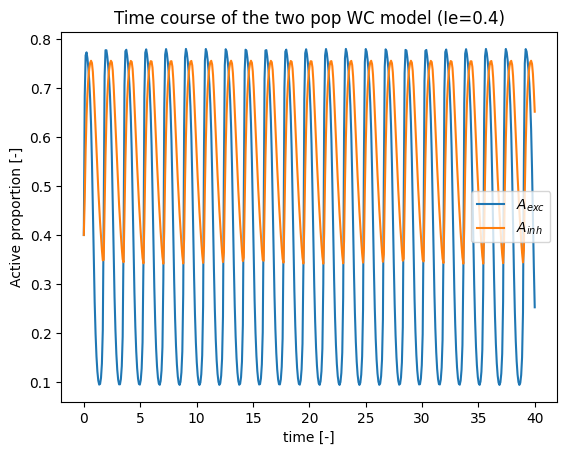

In [160]:
t = np.linspace(0,40,500)
yinit=[.4,0.4]
Ie=0.4
Ii=0

y = odeint(WCmodelTwoPop,yinit,t, args=(Ie,Ii))
plt.plot(t,y[:,0],t,y[:,1])
plt.xlabel('time [-]')
plt.ylabel('Active proportion [-]')
plt.legend(['$A_{exc}$','$A_{inh}$'])
plt.title('Time course of the two pop WC model (Ie=0.4)')
plt.show()

Thus far, we have seen two interesting behaviours of the WC model.  Bistability and oscillations.

WC models can be used  to describe sensory systems such as the retina.

In this context, these bahaviours can be related to images that can be interpreted in two different ways.

### Wilson-Cowan  model with spatial structure

In the context of sensory systems, WC can be assumed to have a spatial structure.

We assume that neuron populations are distributed on a grid.

We assume the they receive a position dependant input.

We also assume that neuron populations send inhbitory connections to their neighbour.  This corresponds to **lateral inhibition**.

We first define a function that specifies how a population of neurons is connected to the nearby populations.

We assume that the weight of the connection decreases with the distance.



In [161]:
def Neighbour_connec():
  #This function computes how a population is connected to its neighbours.
  #OUTPUT:
  #W a weigth matrix
  #NC a litst of connected elements
  NC=[]
  W=np.zeros((11,11))
  for j in range(11):
    x=j-5
    for k in range(11):
      y=k-5
      dist2=x*x+y*y
      weight=0
      if dist2>0:
        weight=-0.5*math.e**(-dist2/4)
      W[j,k]=weight
      NC.append([x,y,weight])
  return W,NC

In [162]:
W, NC=Neighbour_connec()
x=np.zeros(11)
y=np.zeros(11)
for j in range(11):
  x[j]=j-5
  y[j]=j-5
plt.pcolor(x,y, W)
plt.colorbar()
plt.title('Connection weigths')
plt.xlabel('x position')
plt.ylabel('y position')
cmap = plt.get_cmap('gray')
plt.set_cmap(cmap)
plt.show()

In [163]:
def NetworkWC(I):
  #Computes the evoluation of WC model on a grid
  #INPUT:
  #I, a matrix, the injected spatial current
  #OUTPUT
  #Aextime, a three dimension array of real numbers between 0 and 1.
  #the proportion of active neuron in each grid point at each time step
  W, NC=Neighbour_connec()
  Nx=50
  Ny=50
  Time=20
  Aex=np.zeros((Nx,Ny))
  AexNew=np.zeros((Nx,Ny))
  dt=0.1
  Ntime=int(np.floor(Time/dt))
  Aextime=np.zeros((Ntime,Nx,Ny))
  theta=0.5
  s=0.1
  alpha=1
  for t in range(Ntime):
    for x in range(Nx):
      for y in range(Ny):
        Input=I[x,y]
        for n in NC:
          if (x+n[0]>-1) and (x+n[0]<Nx):
            if (y+n[1]>-1) and (y+n[1]<Ny):
              Input=Input+n[2]*Aex[x+n[0],y+n[1]]
        dA=-alpha*Aex[x][y]+4*(1-Aex[x][y])*sigma((Input-theta)/s)
        AexNew[x][y]=Aex[x][y]+dA*dt
        Aextime[t,x,y]=AexNew[x,y]
    Aex=AexNew
  return Aextime



We now define the injected current

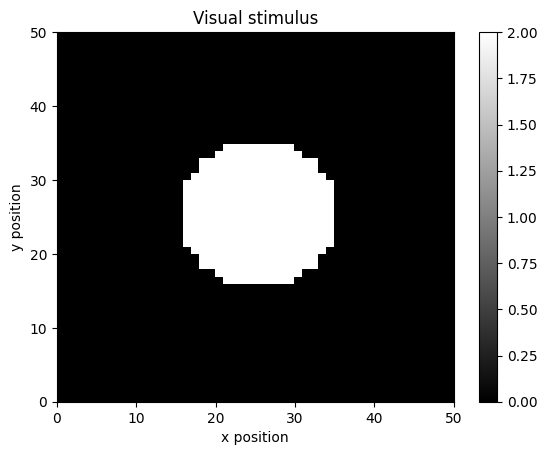

In [164]:
I=np.zeros((50,50))
for x in range(50):
  for y in range(50):
    if ((x-25)*(x-25)+(y-25)*(y-25))<100:
      I[x,y]=2

plt.pcolor(I)
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Visual stimulus')
plt.colorbar()
plt.show()


We now solve the model (this may take a few minutes)

In [165]:
Aextime=NetworkWC(I)

Let's plot the results

In [166]:
plt.pcolor(Aextime[-1,0:50,0:50])
cbar=plt.colorbar()
cbar.set_label('active prop.')
plt.xlabel('x position')
plt.ylabel('y positioon')
plt.title('Response to stimulus')
cmap = plt.get_cmap('viridis')
plt.set_cmap(cmap)
plt.show()

We observe **edge enhancement**.  This occurs in biological visual systems as a result of lateral inhibition.

#### **Exercice related to the Wilson-Cowan model**

In the last figure, we observe a ripple effet around the edge of the stimulus. This is caused by the specific shape of the connections given in the function *Neighbour_connec():*

Change the line

weight=-0.5* math.e* *(-dist2/4)

to obtain a sharper or a less sharp distribution of the weights.

Observe the effect on the neural response to the stimulus.


### Finite automata

We end this section by presenting a formalism that is well suited to model the propagation of a signal on excitable tissue.

An example would be the propagation of an electrical signal through the excitable cells on the heart tissue.

*   We assume that the cells are distributed on a two dimensional grid and that cells are connected to their neighbours.

* We assume that cells can be in **active**, **susceptible** or **refractory** states.

* Active cells become refractory and refractory cells become susceptible.

*   Neurons in susceptible states become active if enough of their neighbours are active.

* We will also specify a set of neurons that spontaneously become active at regular intervals, *pacemaker cells*.

From a mathematical point of view, this is part of a class of models referred to as **finite automata**.  An interesting finite automata is the famous Conway's game of life https://playgameoflife.com/.



We first define a function that defines the neighborhood of a cell.

In [167]:
import numpy as np
import matplotlib.pyplot as plt

def Neighbour():
  #Specifies the neighbourhood of a cell.
  #OUPUT:  A list of the neighbour positions
  N=[]
  N.append([-1,0])
  N.append([1,0])
  N.append([0,-1])
  N.append([0,1])
  return N

Let's write a function that implement this model

In [168]:
def WaveProp(InitialAct,InitialRef=[], NonCond=[],Ntime=100,Interval=15,Nx=20,Ny=20):
#Computes the propagation of excitation on a lattice
#INPUT:
#InitialAct: an array of cells that are active in initial state.
#InitialRef: an array of cells that are refractory in intial ste.
#NonCond: an array of cells that are non conductive (damaged cells)
#Ntime: an integer, the number of time steps in the simulation
#Interval: the number of time steps between pacemaker activation
#Nx, Ny: The size of the grid
#OUTPUT: CellStateVec, a three dimensional array (x,y,t) describing the state of each cell at each time step
#0, susceptible, 1 active, 2 refractory, 3 non conductive

  CellState=np.zeros((Nx,Ny))
  for j in InitialAct:
    CellState[j[0],j[1]]=1
  for j in InitialRef:
    CellState[j[0],j[1]]=2
  for j in NonCond:
    CellState[j[0],j[1]]=1.5

  tresh=0#a cell will become active if the number of active neighbour is >tresh

  CellStateNew=np.zeros((Nx,Ny))
  CellStateVec=np.zeros((Ntime,Nx,Ny))


  #Beginning the main loop
  for t in range(Ntime):
    for x in range(Nx):
      for y in range(Ny):
        if CellState[x][y]==1:
          CellStateNew[x][y]=2
        elif CellState[x][y]==2:
          CellStateNew[x][y]=0
        elif CellState[x][y]==1.5:
          CellStateNew[x][y]=1.5
        else:
        #if CellState[x][y]==0:
          Input=0
          N=Neighbour()
          for n in N:
            if (x+n[0]>-1) and (x+n[0]<Nx):
              if (y+n[1]>-1) and (y+n[1]<Ny):
                if CellState[x+n[0]][y+n[1]]==1:
                  Input=Input+1
          if Input>0:
            CellStateNew[x][y]=1
        if [x,y] in InitialOn:
          if (np.floor(t/Interval)==t/Interval) and t>0:
             CellStateNew[x][y]=1
    CellStateVec[t,0:Nx,0:Ny]=CellState
    CellState=CellStateNew
    CellStateNew=np.zeros((Nx,Ny))
  return CellStateVec



We begin by a simple example a propagating straight line of activity.

First we solve the model:

In [169]:
#Lauching the simulation
Nx=100
Ny=100
InitialOn=[]
NonCond=[]
for j in range(Nx):
  InitialOn.append([0,j])
StateMatVec=WaveProp(InitialOn,NonCond,Nx=100,Ny=100)

Let's import the packages that allow to generate movies in python.

In [170]:
#Importing the package needed to generate a video
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.editor import VideoClip
from moviepy.editor import *

Now let's define a function that will generate a movie

In [171]:
def GenMovie(StateMatVec,Nx,Ny):
  cmap = plt.get_cmap('viridis')
  plt.set_cmap(cmap)
  #plotting the results and generating the vidoes
  fig = plt.figure()
  fig, ax = plt.subplots()
  artists=[]
  seq=[]
  test=0
  for t in range(100):
    ax.pcolor(StateMatVec[t,0:Nx-1,0:Ny-1])
    ax.set_xticks([0,Nx-1])
    ax.set_yticks([0,Ny-1])
    #Adding a manual legend
    ax.annotate('Ref.',color='white', xy =(Nx-15, Ny-5))
    ax.annotate('Active',color='white', xy =(Nx-15, Ny-10))
    ax.annotate('Susc.',color='white', xy =(Nx-15, Ny-15))
    ax.annotate('Non Cond.',color='white', xy =(Nx-15, Ny-20))
    ax.plot([Nx-20],[Ny-20],'o',markerfacecolor='limegreen',markeredgecolor='white')
    ax.plot([Nx-20],[Ny-5],'o',markerfacecolor='yellow',markeredgecolor='white')
    ax.plot([Nx-20],[Ny-10],'o',markerfacecolor='darkcyan',markeredgecolor='white')
    ax.plot([Nx-20],[Ny-15],'o',markerfacecolor='navy',markeredgecolor='white')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title('Signal propagation')
    name=str(t)+'.png'
    fig.savefig(name)
    seq.append(name)
  return seq




Let's generate the movie (this can take a few minutes)

In [172]:
seq=GenMovie(StateMatVec,100,100)
clip = ImageSequenceClip(seq,fps=8)
clip.ipython_display(width = 550)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Not much happening here.

Let's give another simple example in which the signal originates from a point rather than a line.

In [173]:
Nx=100
Ny=100
InitialOn=[]
NonCond=[]
for x in range(Nx):
  for y in range(Ny):
    dist2=(x-50)*(x-50)+(y-50)*(y-50)
    if dist2<20:
      InitialOn.append([x,y])

StateMatVec=WaveProp(InitialOn,NonCond,Nx=100,Ny=100)

Let's plot the result and generate a movie (this can take a few minutes)


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

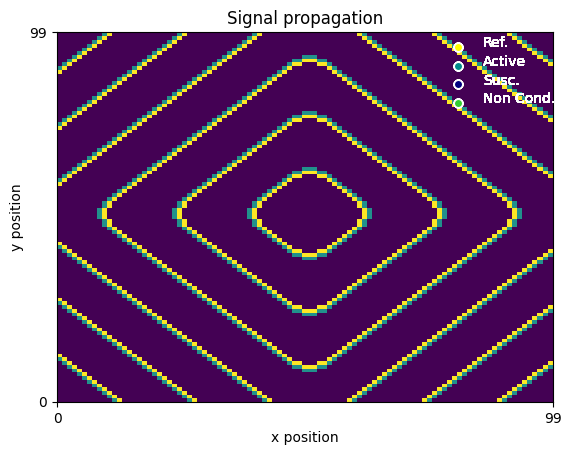

In [174]:
seq=GenMovie(StateMatVec,Nx=100,Ny=100)
clip = ImageSequenceClip(seq,fps=8)
clip.ipython_display(width = 480)

A smoothly propagating wave on an excitable medium is the ideal scenario.

However, this can be perturbated in many ways.

A first possible scenario is that two colliding waves will destroy each other.

Let's launch the simulation with updated initial conditions.

In [175]:
Nx=100
Ny=100
InitialOn=[]
NonCond=[]
for j in range(Nx):
  InitialOn.append([0,j])
  InitialOn.append([Ny-1,j])
StateMatVec=WaveProp(InitialOn,NonCond,Nx=100,Ny=100)

Let's generate the movie again

In [176]:
seq=GenMovie(StateMatVec,100,100)
clip = ImageSequenceClip(seq,fps=8)
clip.ipython_display(width = 480)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

It is possible that some damaged cells won't conduct the signal.

We run a simulation with a patch of damaged cells at the center of the medium.

In [177]:
Nx=100
Ny=100
NC=[]
for x in range(Nx):
  for y in range(Ny):
    dist2=(x-50)*(x-50)+(y-50)*(y-50)
    if dist2<40:
      NC.append([x,y])


InitialOn=[]
for j in range(Nx):
  InitialOn.append([0,j])
StateMatVec=WaveProp(InitialOn,[],NC,Nx=100,Ny=100)

Generating the movie (this can take a few minutes)

In [178]:
seq=GenMovie(StateMatVec,100,100)
clip = ImageSequenceClip(seq,fps=8)
clip.ipython_display(width = 480)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

This is a good scenario where the signal goes around the obstacle and continues with a relatively small perturbation.

It is however possible that the signal will spiral around the obstacle.

In this context of the propagation of an electrical signal on cardiac tissue, this can be problematic.

In [179]:

Nx=100
Ny=100
InitialOn=[]
for j in range(45):
  InitialOn.append([50,j])

InitialRef=[]
for j in range(45):
  InitialRef.append([51,j])
  InitialRef.append([52,j])

StateMatVec=WaveProp(InitialOn,InitialRef=InitialRef,NonCond=NC,Ntime=100,Interval=150,Nx=100,Ny=100)


Generating the movie (this can take a few minutes)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

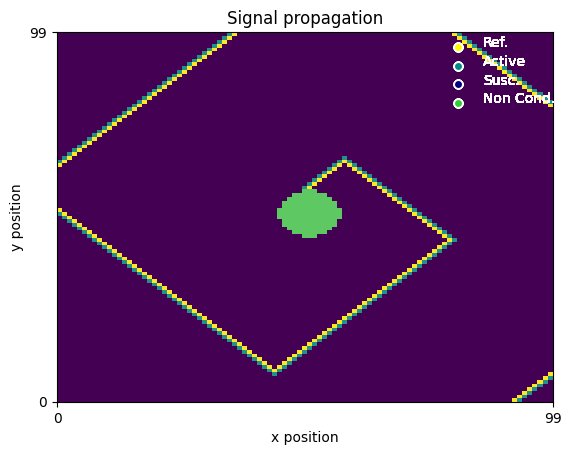

In [180]:
seq=GenMovie(StateMatVec,100,100)
clip = ImageSequenceClip(seq,fps=8)
clip.ipython_display(width = 480)

#### **Exercice related to finite automata**

Play Conway's game of life!  The goal is to appreciate how complex behaviour can emerge from automatas with only a few  rules.